# Hola, me llamo Brandon Uriel García Sánchez soy Cientifico de datos

### Mi objetivo:
Es explorar y entender la tasa de abandono escolar en México, considerando distintos factores:

***Por estado: identificar los estados con mayor y menor tasa de abandono.***

***Por género: analizar cómo varia la tasa de abandono entre hombres y mujeres.***

***Segmentación de la Ciudad de México: observar patrones locales dentro de la capital.***

***Clusters: agrupar estados con características similares en cuanto a matrícula, egresos y abandono.***

***Regresión lineal: evaluar cómo variables como matrícula por género y nuevos ingresos influyen sobre la tasa de abandono.***


[Los datos fueron extraidos de](https://www.anuies.mx/informacion-y-servicios/informacion-estadistica-de-educacion-superior/anuario-estadistico-de-educacion-superior
)
Provienen del Anuarios Estadísticos de Educación Superior ANUIES o mejor conocido como: (MEXICO)
Asociación Nacional de Universidades
e Instituciones de Educación Superior

Los ciclos escolares de muestra fueron 2023-2024 para una analisis más completo

## Proposito:
Determinar qué factores tienen mayor impacto en la tasa de abandono el realmente que dicen los datos respecto a la tasa de abandono y deserción escolar proviene de un problema multifactorial que con ayuda de los datos podemos complemtentarlo con un analisis social para resolver este problema nacional.




In [73]:
import pandas as pd # manipulación de datos
import matplotlib.pyplot as plt # creación de gráficos
import seaborn as sns # agregar diseños a los mismos graficos de matplot
import numpy as np # funciones matemáticas
from sklearn.model_selection import train_test_split # modelo de sciklearn machine learning para entrenar los datos y separarlos
from sklearn.metrics import mean_squared_error, r2_score # metricas de errores respecto a la r**2 y MSE
import requests
from sklearn.cluster import KMeans # modelo sciklearn para agrupar datos relacionados en un cluster mediante aprendisaje no supervisado
from sklearn.preprocessing import StandardScaler # modelar los clusters después del algoritmo de machine learning

import plotly.express as px # graficar un mapeo de la tasa de descerción de México

In [74]:
df_escolar = pd.read_excel("Datos 2023-2024.xlsx") # cargar en un dataframe los datos

In [75]:
df_escolar.isnull().sum() # verificamos los datos nulos del df

Estado                   0
Matrícula Mujeres        0
Matrícula Hombres        0
Matrícula Total          0
Nuevo Ingreso Mujeres    0
Nuevo Ingreso Hombres    0
Nuevo Ingreso Total      0
Egresados Mujeres        0
Egresados Hombres        0
Egresados Total          0
dtype: int64

In [76]:
df_escolar.head(20) # creamos un encabezado de 20 para analizar los datos

,Estado,Matrícula Mujeres,Matrícula Hombres,Matrícula Total,Nuevo Ingreso Mujeres,Nuevo Ingreso Hombres,Nuevo Ingreso Total,Egresados Mujeres,Egresados Hombres,Egresados Total
0,AGUASCALIENTES,37734,31295,69029,11142,9765,20907,8164,6521,14685
1,BAJA CALIFORNIA,79287,69878,149165,19163,16542,35705,16338,12347,28685
2,BAJA CALIFORNIA SUR,14398,11602,26000,4547,3548,8095,2536,1784,4320
3,CAMPECHE,30811,23279,54090,11752,8843,20595,4683,3344,8027
4,CHIAPAS,66614,59818,126432,19438,17687,37125,18186,13957,32143
5,CHIHUAHUA,78952,66379,145331,18140,16078,34218,13776,10061,23837
6,CIUDAD DE MÉXICO,520939,469010,989949,119602,104026,223628,84213,69533,153746
7,COAHUILA,73656,67536,141192,22999,19966,42965,14510,12928,27438
8,COLIMA,16604,12748,29352,5562,4299,9861,3556,2637,6193
9,DURANGO,34083,29095,63178,9397,8373,17770,7014,5613,12627


In [77]:
df_escolar = df_escolar.rename(columns={"Estado":"estado",
                                        "Matrícula Mujeres":"matricula_mujeres",
                                        "Matrícula Hombres":"matricula_hombres",
                                        "Matrícula Total":"matricula_total",
                                        "Nuevo Ingreso Mujeres":"nuevo_ingreso_mujeres",
                                        "Nuevo Ingreso Hombres":"nuevo_ingreso_hombres",
                                        "Nuevo Ingreso Total":"nuevo_ingreso_total",
                                        "Egresados Mujeres":"egresados_mujeres",
                                        "Egresados Hombres":"egresados_hombres",
                                        "Egresados Total":"egresados_total"})


# renombramos los estados para una mejor manipulción de columnas y evitar errores de espacios y demás problematicas en el analisis

In [78]:
df_estados = df_escolar[df_escolar["estado"]!="Total general"].copy() # generamos una copia en otro dataframe llamado df_estados para realizar el analisis
df_estados.tail() # verificamos que no tenemos el row o fila de Total_General para con un .tail() para ver los ultimos 5

,estado,matricula_mujeres,matricula_hombres,matricula_total,nuevo_ingreso_mujeres,nuevo_ingreso_hombres,nuevo_ingreso_total,egresados_mujeres,egresados_hombres,egresados_total
27,TAMAULIPAS,80045,67164,147209,24691,20490,45181,18634,13065,31699
28,TLAXCALA,22755,18606,41361,6050,5010,11060,4352,2930,7282
29,VERACRUZ,140684,120751,261435,44090,37619,81709,27363,20435,47798
30,YUCATÁN,48197,43722,91919,14138,12768,26906,10003,8223,18226
31,ZACATECAS,30847,24034,54881,9026,7037,16063,6279,4333,10612


abandono_estimado: calcula cuántos estudiantes no continuaron ni egresaron, es decir, los que abandonaron.

tasa_de_abandono: convierte el número absoluto en porcentaje respecto a la matrícula total, para comparar entre estados grandes y pequeños.

Razón: números crudos de abandono no permiten comparar estados el porcentaje estandariza la medida normalizandola.

In [79]:
df_estados["abandono_estimado"] = df_estados["matricula_total"] - (df_estados["nuevo_ingreso_total"] + df_estados["egresados_total"]) # creamos una columna nueva llamada abandono_estimado
df_estados["tasa_de_abandono"] = (df_estados["abandono_estimado"] / df_estados["matricula_total"] * 100).round(2) # creamos la tasa de abandono por procentaje

La siguiente formula es la usada en las proporciones, tiene fundamentos mátematicos y estadísticos

Si usamos directamente los números absolutos (matrícula, egresados, nuevos ingresos):

Estados grandes dominan el análisis: Ejemplo, CDMX tiene miles de estudiantes; un estado pequeño como Zacatecas solo cientos.

Los modelos estadísticos (regresión, clustering) podrían interpretar el tamaño del estado como efecto, en lugar de la verdadera relación entre variables.

Facilita la interpretación de coeficientes en modelos estadísticos, porque cada variable está en la misma escala (0 a 1 o 0% a 100%).


---



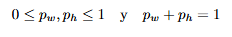

***donde pw = proporcion de mujeres matriculadas***

***donde ph = proporcion de hombres matriculados***




---







\begin{align*}
\text{Abandono estimado} &= \text{Matrícula total} - (\text{Nuevos ingresos} + \text{Egresados}) \\
\text{Tasa de abandono (\%)} &= \dfrac{\text{Abandono estimado}}{\text{Matrícula total}} \times 100 \\
\text{Proporción matrícula mujeres} &= \dfrac{\text{Matrícula mujeres}}{\text{Matrícula total}} \\
\text{Proporción matrícula hombres} &= \dfrac{\text{Matrícula hombres}}{\text{Matrícula total}} \\
\text{Proporción egresadas mujeres} &= \dfrac{\text{Egresadas mujeres}}{\text{Matrícula total}} \\
\text{Proporción egresados hombres} &= \dfrac{\text{Egresados hombres}}{\text{Matrícula total}}
\end{align*}

Se segmenta por género para analizar diferencias entre hombres y mujeres.

Se divide entre matricula_total para obtener proporciones (0 a 1)

¿Por qué? estados tienen tamaños muy distintos y las proporciones permiten comparar relativamente, no solo por número de estudiantes.

Esto también ayuda a modelos de regresión o clustering ya propuestos, porque los números están normalizados y los coeficientes reflejan efecto relativo, no tamaño bruto del estado o capital

In [80]:
df_estados["proporcion_matricula_mujeres"] = df_estados["matricula_mujeres"] / df_estados["matricula_total"]
df_estados["proporcion_matricula_hombres"] = df_estados["matricula_hombres"] / df_estados["matricula_total"] # segmentamos por proporciones cada columna por matricula y egresados para ambos generos
df_estados["proporcion_egresadas_mujeres"] = df_estados["egresados_mujeres"] / df_estados["matricula_total"] # segmentamos por proporciones cada columna por matricula y egresados para ambos generos
df_estados["proporcion_egresados_hombres"] = df_estados["egresados_hombres"] / df_estados["matricula_total"]

In [81]:
df_estados.head() # visualizamos los primeros 5 con las nuevas columnas y datos

,estado,matricula_mujeres,matricula_hombres,matricula_total,nuevo_ingreso_mujeres,nuevo_ingreso_hombres,nuevo_ingreso_total,egresados_mujeres,egresados_hombres,egresados_total,abandono_estimado,tasa_de_abandono,proporcion_matricula_mujeres,proporcion_matricula_hombres,proporcion_egresadas_mujeres,proporcion_egresados_hombres
0,AGUASCALIENTES,37734,31295,69029,11142,9765,20907,8164,6521,14685,33437,48.44,0.546640,0.453360,0.118269,0.094468
1,BAJA CALIFORNIA,79287,69878,149165,19163,16542,35705,16338,12347,28685,84775,56.83,0.531539,0.468461,0.109530,0.082774
2,BAJA CALIFORNIA SUR,14398,11602,26000,4547,3548,8095,2536,1784,4320,13585,52.25,0.553769,0.446231,0.097538,0.068615
3,CAMPECHE,30811,23279,54090,11752,8843,20595,4683,3344,8027,25468,47.08,0.569625,0.430375,0.086578,0.061823
4,CHIAPAS,66614,59818,126432,19438,17687,37125,18186,13957,32143,57164,45.21,0.526876,0.473124,0.143840,0.110391


In [82]:
df_estados.describe().round(2) # analisis descriptivo


"""
 realizamos un analisis descriptivo para ver como se comportan los datos, ver la media total, su desviación estandar cuanto varía
 en base a la media, vemos la media de tasa de abandono, sus valores minimos y máximos y sus quartiles.
 vemos la proporción de matricula por genero y  sus egresos

"""

'\n realizamos un analisis descriptivo para ver como se comportan los datos, ver la media total, su desviación estandar cuanto varía\n en base a la media, vemos la media de tasa de abandono, sus valores minimos y máximos y sus quartiles.\n vemos la proporción de matricula por genero y  sus egresos\n\n'

#**El proposito de este gráfico es para ver la unidad de matricula por total de cada estado de la republica mexicana**

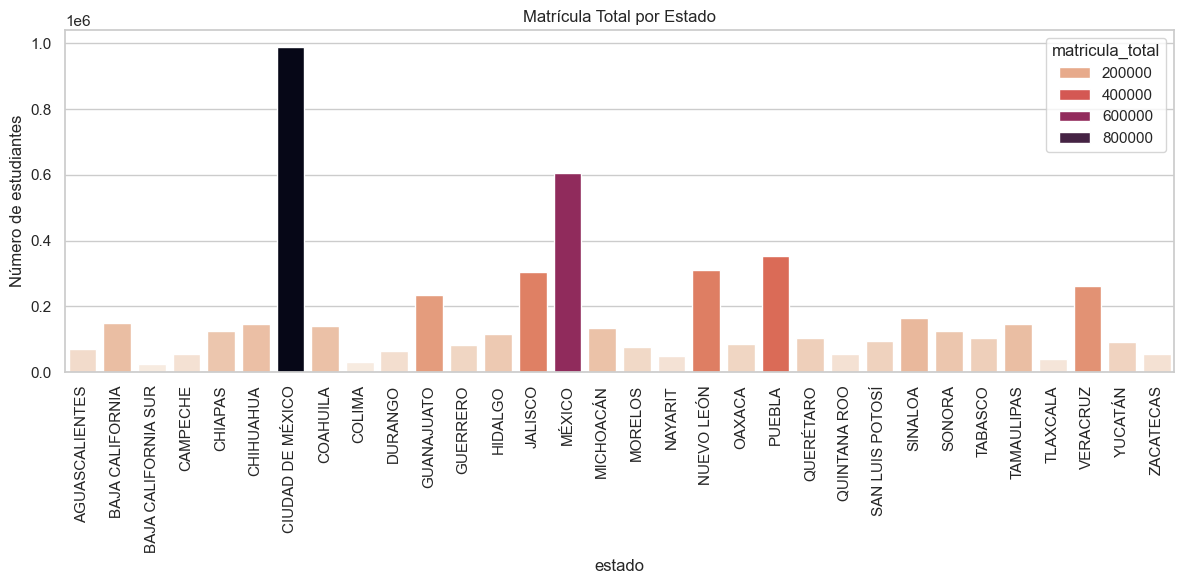

In [83]:
plt.figure(figsize=(12,6)) # definimos el tamaño de la figura
sns.barplot(x="estado", y="matricula_total", data=df_estados, palette="rocket_r",hue="matricula_total") # grafico de barras usamos la X como estado y Y para la matricula total
# la clasificiación es por matricula total del  eje Y
plt.xticks(rotation=90) # rotamos 90 grados el texto para que quepa
plt.title("Matrícula Total por Estado") # creamos el titulo del grafico
plt.ylabel("Número de estudiantes") # etiqueta del eje y
plt.tight_layout() # acomodamos las variables
plt.show() # mostramos el gráfico





# grafico 1.1

#**El proposito de este gráfico es ver los egresados totales por cada estado de la republica mexicana**

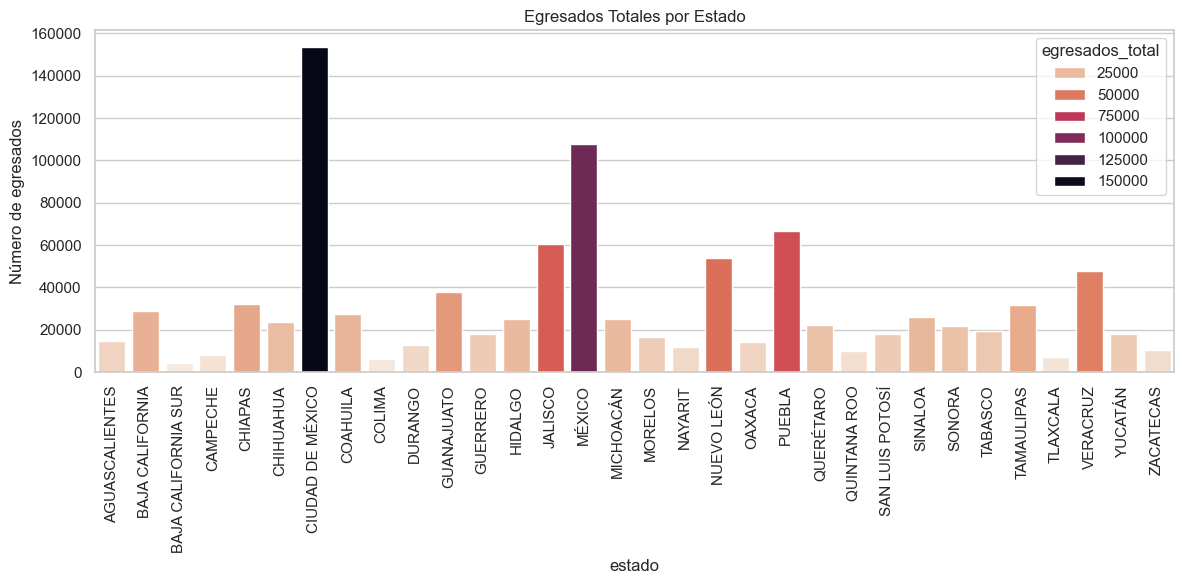

In [84]:
plt.figure(figsize=(12,6)) # definimos el tamaño de la figura
sns.barplot(x="estado", y="egresados_total", data=df_estados, palette="rocket_r", hue="egresados_total") # grafico de barras usamos la X como estado y Y para la egresados_total
# se basa en la clasificacion de los egresados_total del eje Y
plt.xticks(rotation=90) # rotamos el texto 90 grados
plt.title("Egresados Totales por Estado") # titulo del grafico que es los egresados totales por estado de la republica
plt.ylabel("Número de egresados") # etiqueta del eje Y
plt.tight_layout() # acomoda el grafico
plt.show() # lo muestra

# grafico 1.2

#**El proposito de este gráfico es ver la tasa de abandono estimada por Estado por porcentaje (%)**

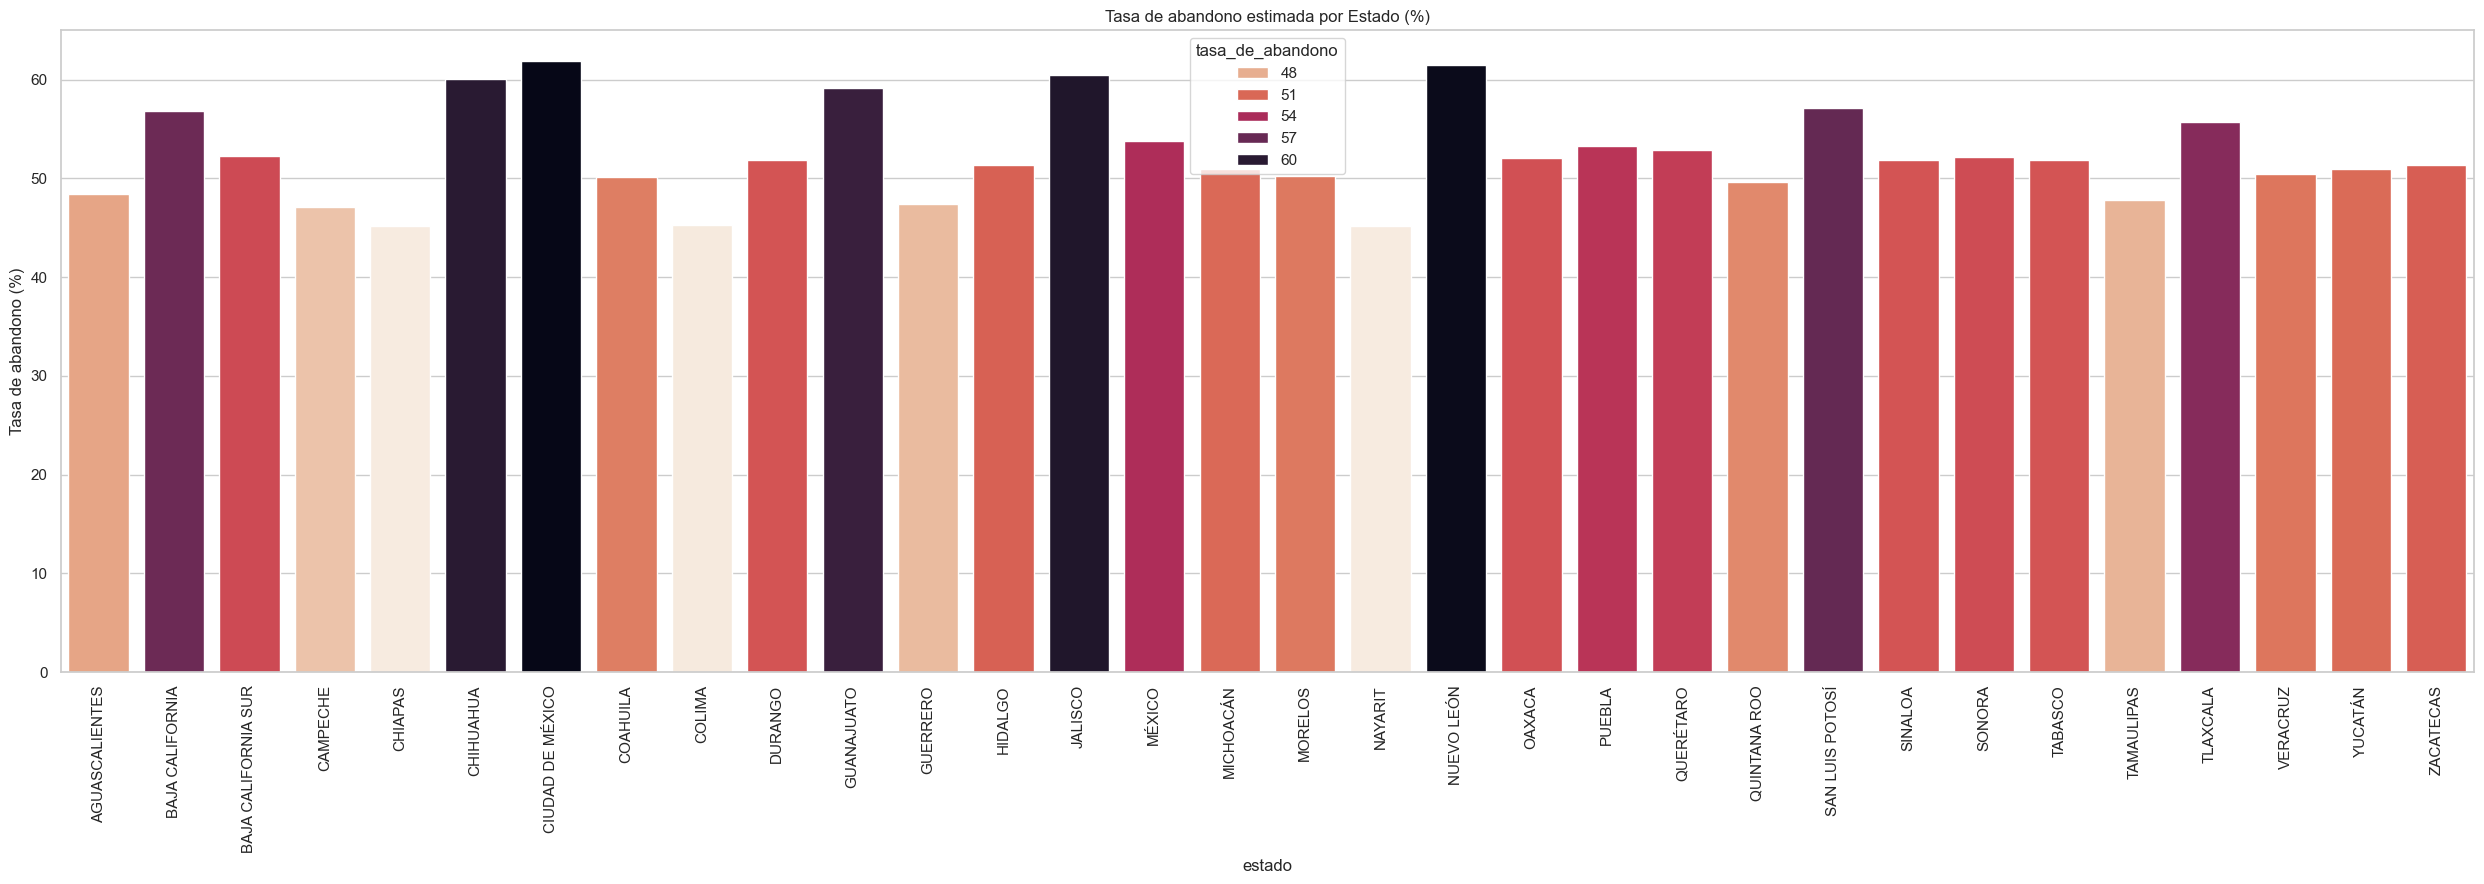

In [85]:
plt.figure(figsize=(25,9)) # define el tamaño
sns.barplot(x="estado", y="tasa_de_abandono", data=df_estados, palette="rocket_r",hue="tasa_de_abandono") # X como estado y Y por la tasa de abandono
# la clasificación es por el eje Y de tasa de abandono hecho
plt.xticks(rotation=90) # rota el texto 90 grados
plt.title("Tasa de abandono estimada por Estado (%)") # titulo del grafico
plt.ylabel("Tasa de abandono (%)") # etiqueta de la tasa de abandono por porcentaje
plt.tight_layout() # acomoda el grafico
plt.show() # muestra el grafico

# grafico 1.3

# **¿Qué dicen estos datos?**

***La imagen 1.1*** : demuestra que en la **CDMX** esta la mayor parte de oportunidad por su alta variedad de universidades y oportunidades educativas, así mismo concentramos gran parte de la población total méxicana, por tanto, se entiende que tenemos la mayor parte personas matriculadas en una universidad
(la muestra incluye privadas,tecnicas, y universidades publicas)

pero tambien muestra que en otros estados de la republica como **Zacatecas** o **Tlaxcala** no hay muchos matriculados en universidades también influye la densidad poblacional pero tambien un patrón que nos indica que hay que reforzar más la educación en esos estados vulnerables y con poca oportunidad educativa.

*"Viajar a la capital es la mejor opción para salir adelante"*

***La imagen 1.2*** : demuestra que en la **CDMX** así como tiene mayor parte de matriculados en una universidad tiene una cantidad exorbitante de egresados
no podemos sacar mucha conclusión por la muestra tan grande como la **CDMX** sesga a los demás estados y por eso mismo hice la imagen 1.3 que es la siguiente

***La imagen 1.3*** : Esta es la gráfica más interesante de las tres porque por la misma lógica de fundamentada anteriormente... por tanto, podemos proporcionar las tasas estimadas de deserción escolar por estado eliminando los sesgos y normalizando los datos.
# **¿Qué dicen?**
La tasa de deserción estimada lo lidera **CDMX**,**Nuevo León**,**Jalisco** y **Chihuahua** de ahí seguiría **Tlaxcala**, **San Luis Potosí** y **Baja california**.
Serían los sectores para aplicar una estrategía de retención estudiantil. Por otro lado los numeros son preocupantes por estado, la media de deserción por parte del analisis descriptivo vemos que la tasa de deserción por media estimada es de 52.38% lo que es un problema enorme que necesita ser reforzado.



-----------------------------




# **¿Que sigue?**
Bueno estamos casí a medio camino, ahora lo que quiero es en base a las columnas ya separadas empezar a segmentar los datos en base a su genero, para un analisis más completo en base a los datos que tenemos en el dataframe.

Lo siguiente que hará será un sacar la **proporción de matriculados y egresados (terminaron sus estudios) por genero en cada estado de la republica Mexicana**, para esto necesitamos crear otro dataframe con las columnas ya hechas, como si fuera un copy y past. Lo siguiente que haremos será una clasificación con un lambda para que si X es == a "Mujeres" sea este en mujeres de lo contrario que se vaya a hombres

Esto puede parecer pura fantochada pero a la hora de la visualización de los datos será clave para el analisis.
En base a esto cambiamos el nombre de las variables de **proporcion_matricula_mujeres" a "Matricula Mujeres"** para una visualización más limpia

En base a la clasificación podemos definir los colores para cada punto
***Hombres = Azul Mujeres = Rosa en formato hexadecimal***

Despues itermaos en cada estado en base al df_genero y sus consecuentes,
#**¿El resultado?**
Que imprima Valores

Metrica como forma de evaluar

*   Estado de origen
*   Metrica como forma de evaluar
*   Su genero
*   Su proporción por egreso %



Valores de proporción - AGUASCALIENTES:
               Metrica   Genero  Proporción
0   Matrícula Mujeres  Mujeres    0.546640
32  Matrícula Hombres  Hombres    0.453360
64  Egresadas Mujeres  Mujeres    0.118269
96  Egresados Hombres  Hombres    0.094468


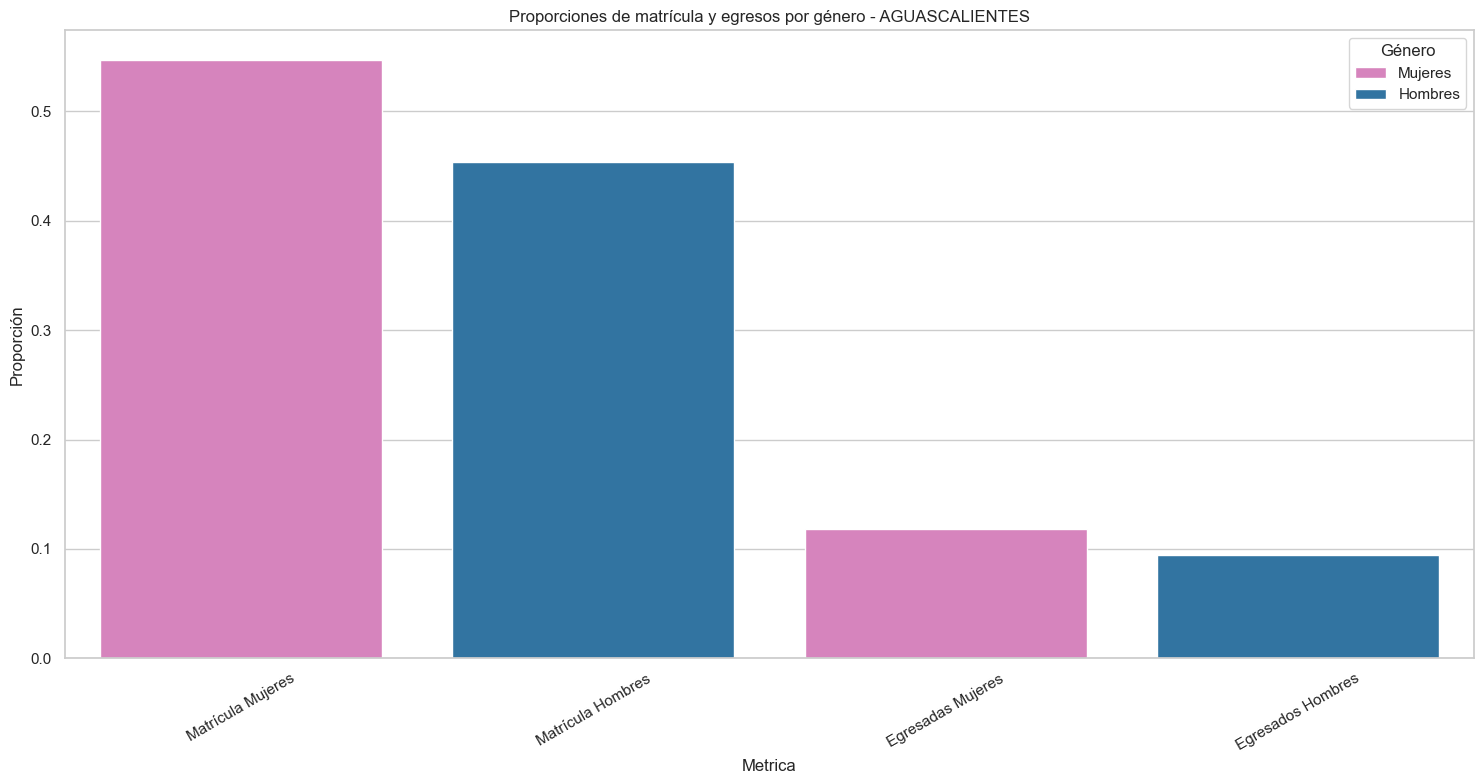


Valores de proporción - BAJA CALIFORNIA:
               Metrica   Genero  Proporción
1   Matrícula Mujeres  Mujeres    0.531539
33  Matrícula Hombres  Hombres    0.468461
65  Egresadas Mujeres  Mujeres    0.109530
97  Egresados Hombres  Hombres    0.082774


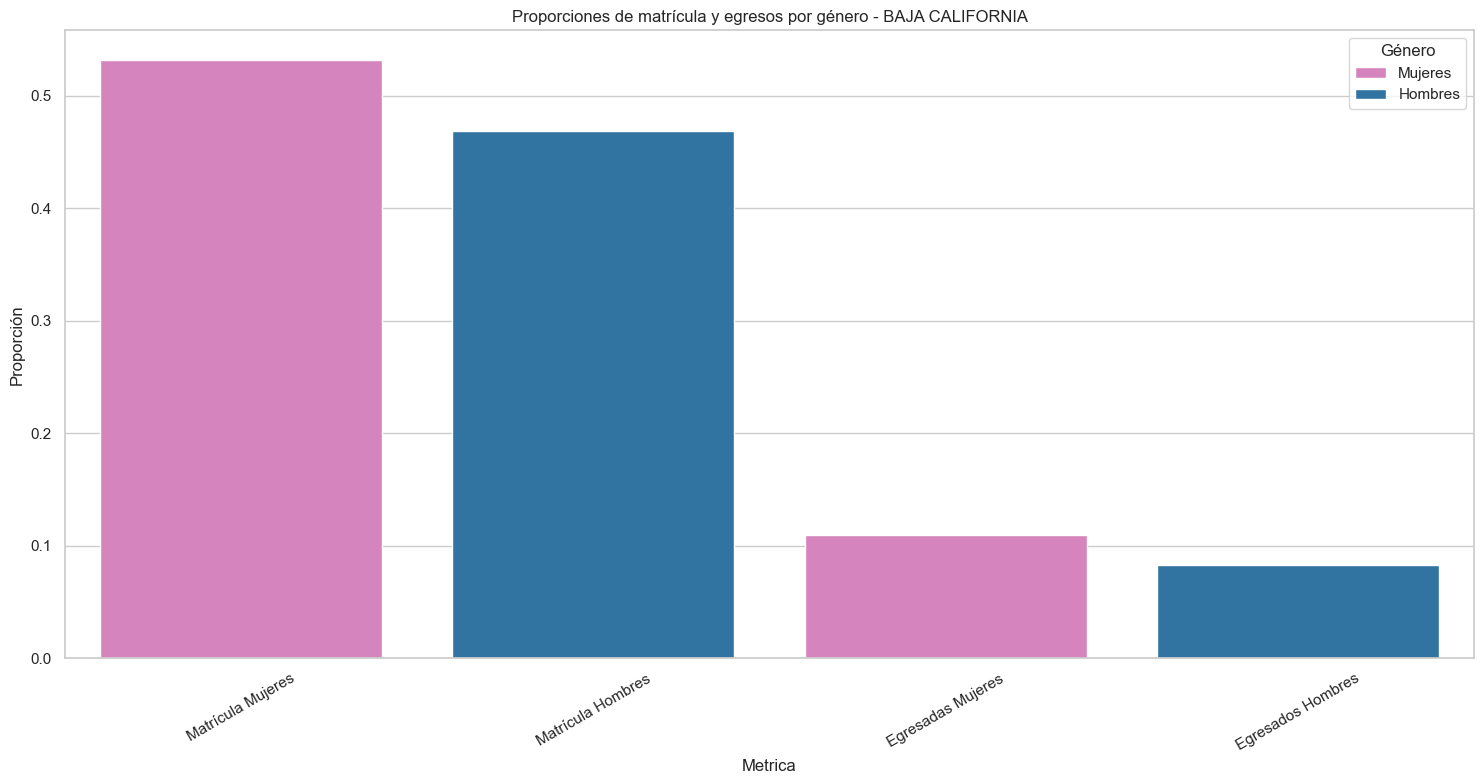


Valores de proporción - BAJA CALIFORNIA SUR:
               Metrica   Genero  Proporción
2   Matrícula Mujeres  Mujeres    0.553769
34  Matrícula Hombres  Hombres    0.446231
66  Egresadas Mujeres  Mujeres    0.097538
98  Egresados Hombres  Hombres    0.068615


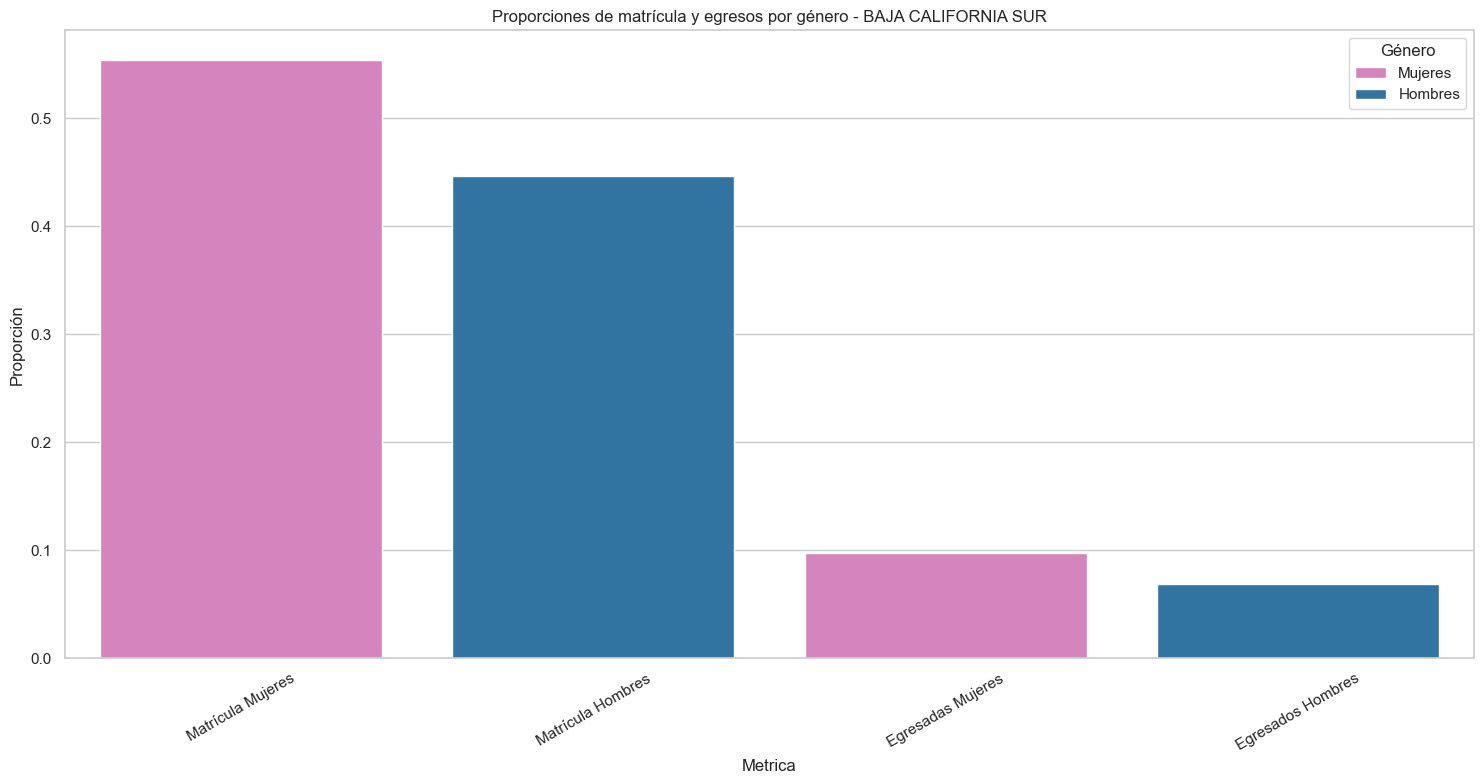


Valores de proporción - CAMPECHE:
               Metrica   Genero  Proporción
3   Matrícula Mujeres  Mujeres    0.569625
35  Matrícula Hombres  Hombres    0.430375
67  Egresadas Mujeres  Mujeres    0.086578
99  Egresados Hombres  Hombres    0.061823


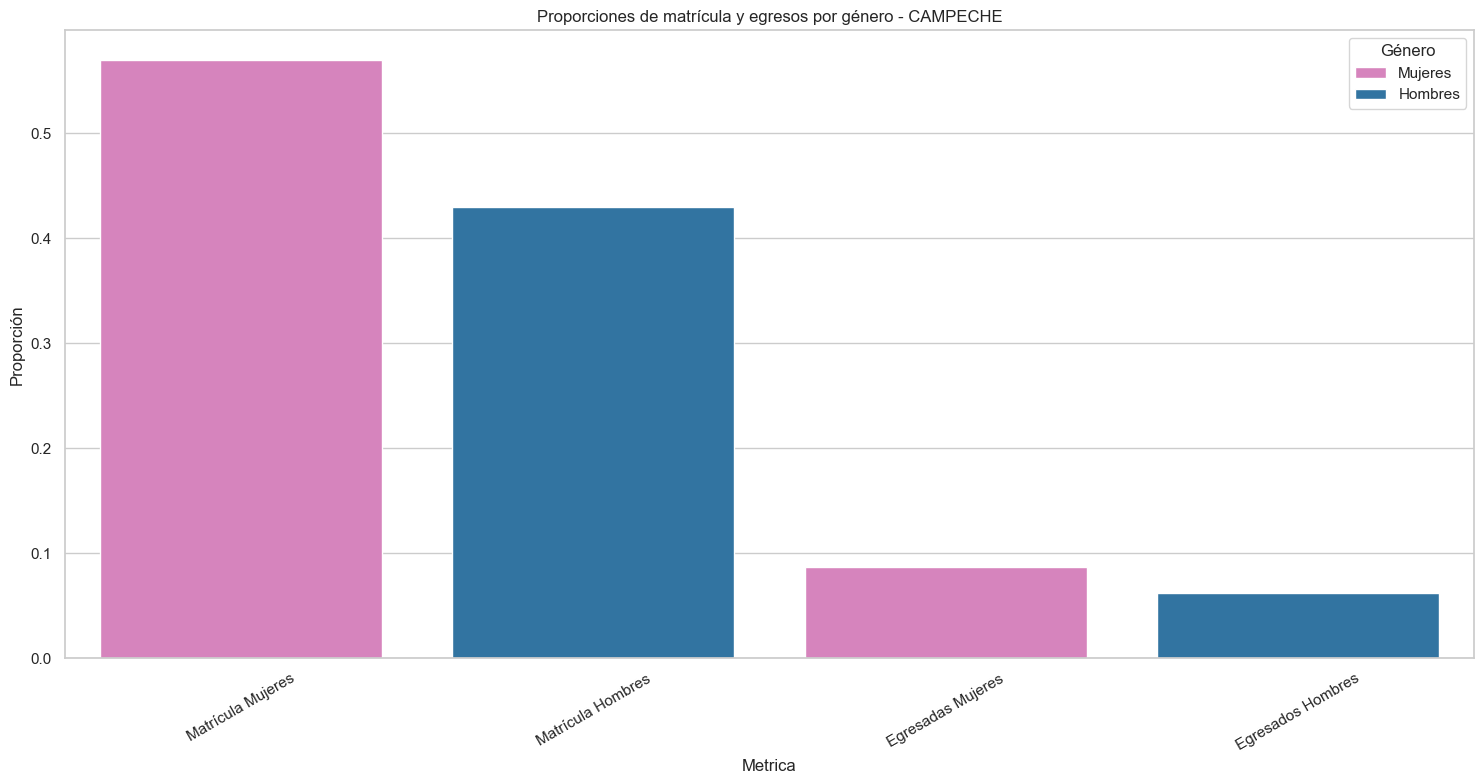


Valores de proporción - CHIAPAS:
                Metrica   Genero  Proporción
4    Matrícula Mujeres  Mujeres    0.526876
36   Matrícula Hombres  Hombres    0.473124
68   Egresadas Mujeres  Mujeres    0.143840
100  Egresados Hombres  Hombres    0.110391


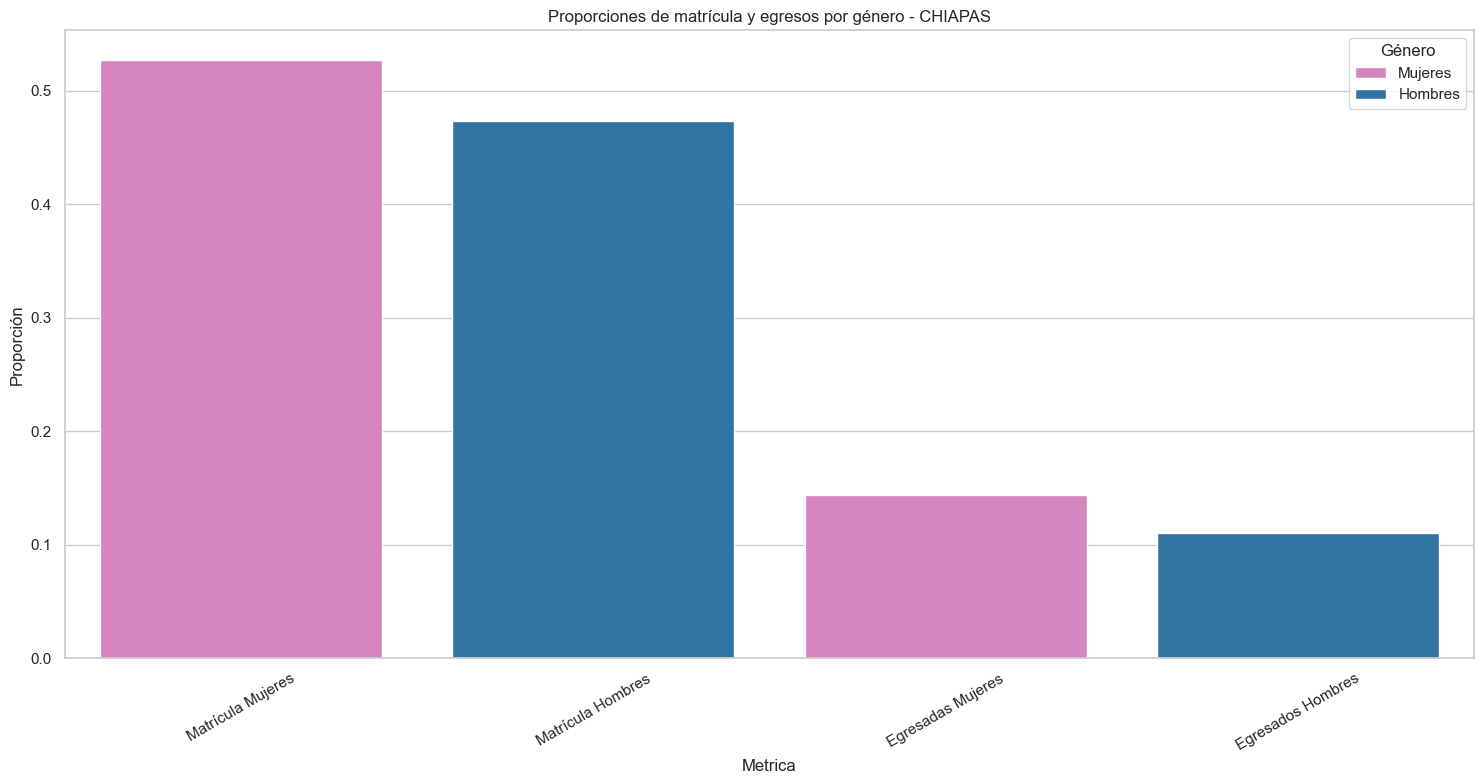


Valores de proporción - CHIHUAHUA:
                Metrica   Genero  Proporción
5    Matrícula Mujeres  Mujeres    0.543256
37   Matrícula Hombres  Hombres    0.456744
69   Egresadas Mujeres  Mujeres    0.094791
101  Egresados Hombres  Hombres    0.069228


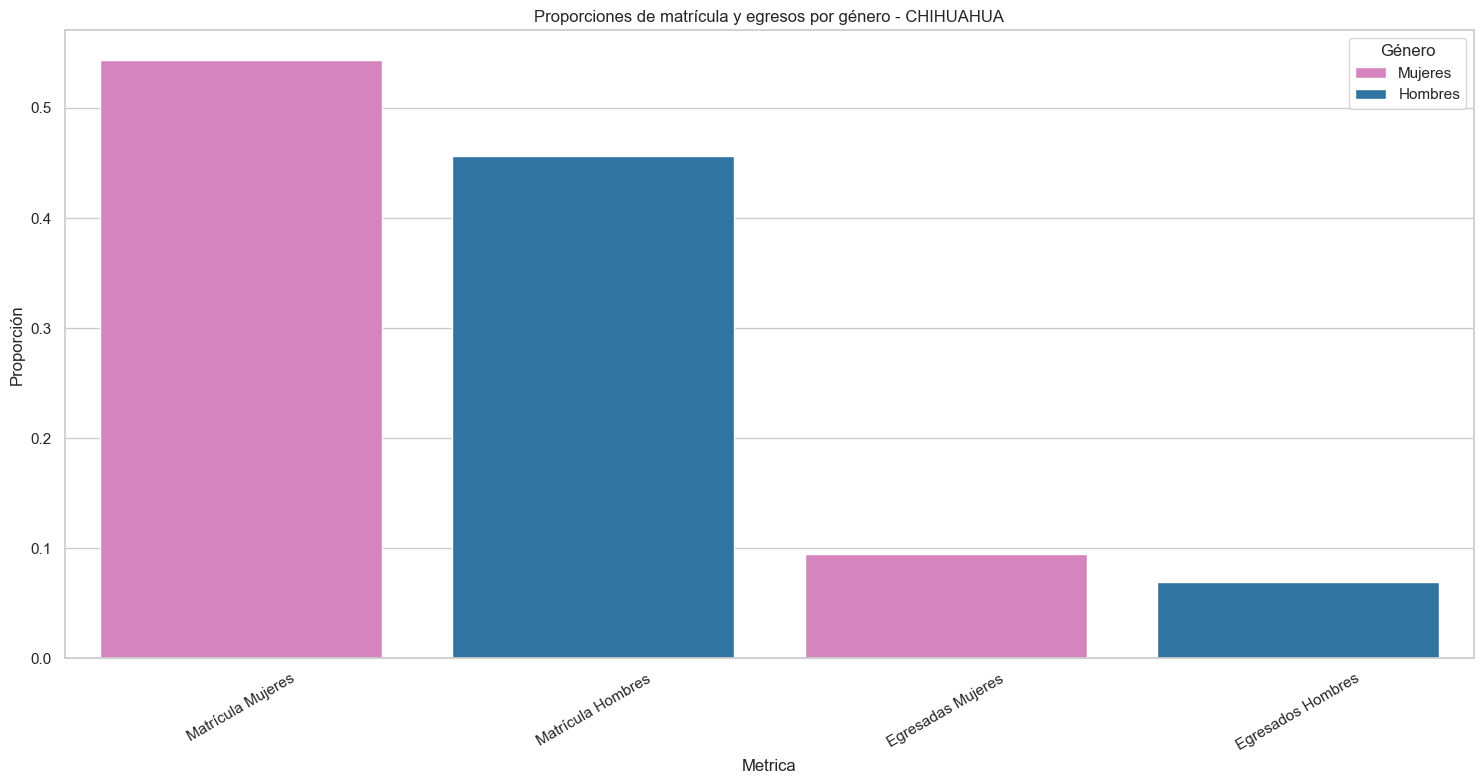


Valores de proporción - CIUDAD DE MÉXICO:
                Metrica   Genero  Proporción
6    Matrícula Mujeres  Mujeres    0.526228
38   Matrícula Hombres  Hombres    0.473772
70   Egresadas Mujeres  Mujeres    0.085068
102  Egresados Hombres  Hombres    0.070239


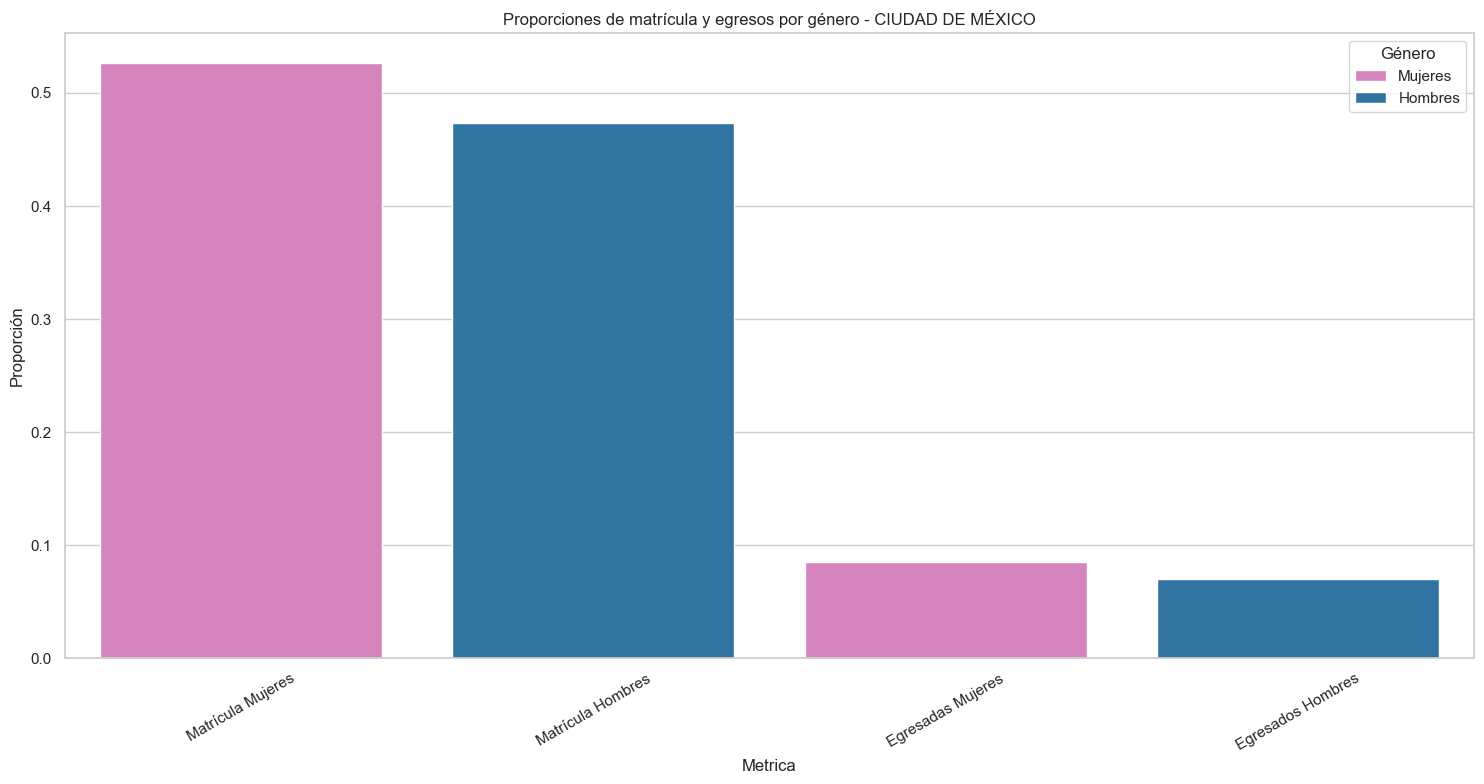


Valores de proporción - COAHUILA:
                Metrica   Genero  Proporción
7    Matrícula Mujeres  Mujeres    0.521673
39   Matrícula Hombres  Hombres    0.478327
71   Egresadas Mujeres  Mujeres    0.102768
103  Egresados Hombres  Hombres    0.091563


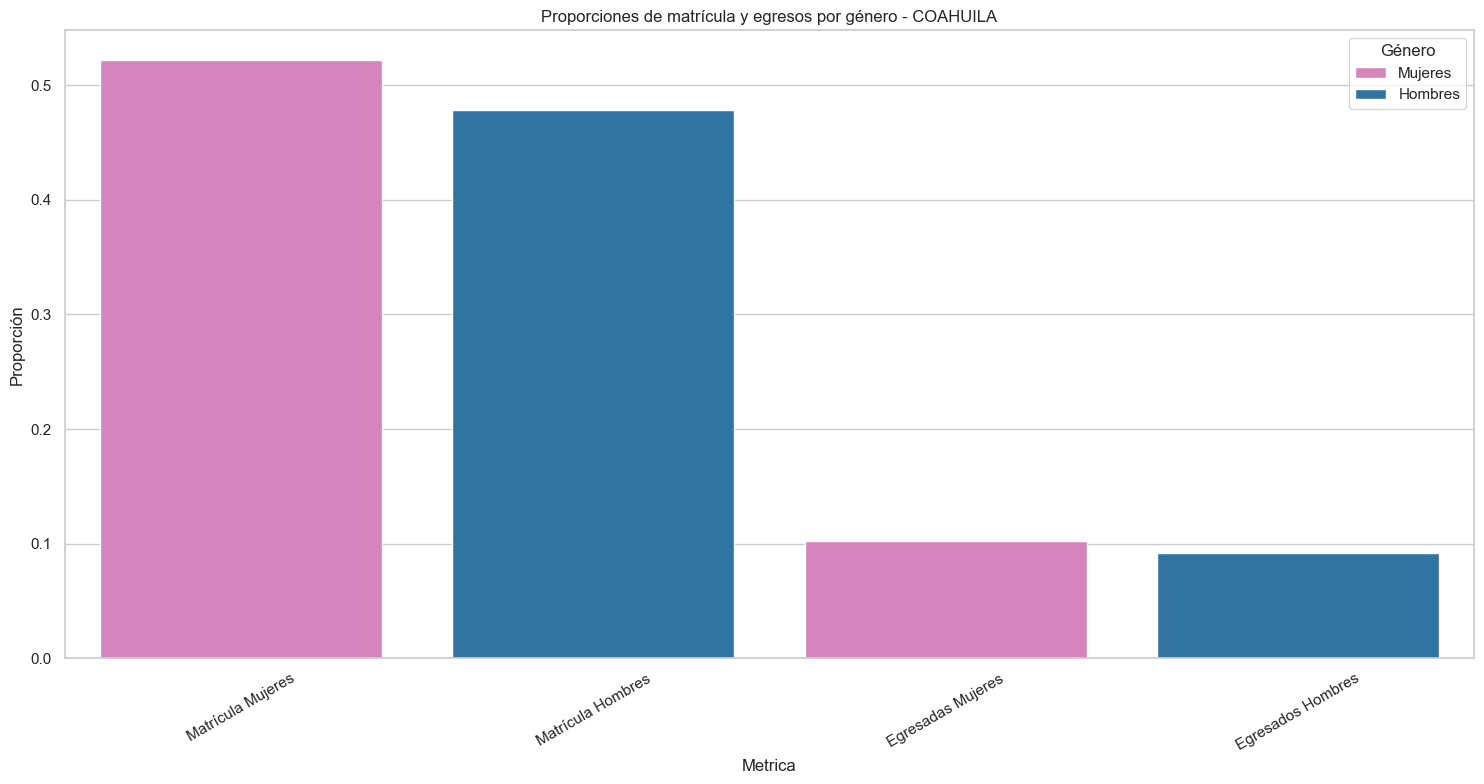


Valores de proporción - COLIMA:
                Metrica   Genero  Proporción
8    Matrícula Mujeres  Mujeres    0.565685
40   Matrícula Hombres  Hombres    0.434315
72   Egresadas Mujeres  Mujeres    0.121150
104  Egresados Hombres  Hombres    0.089841


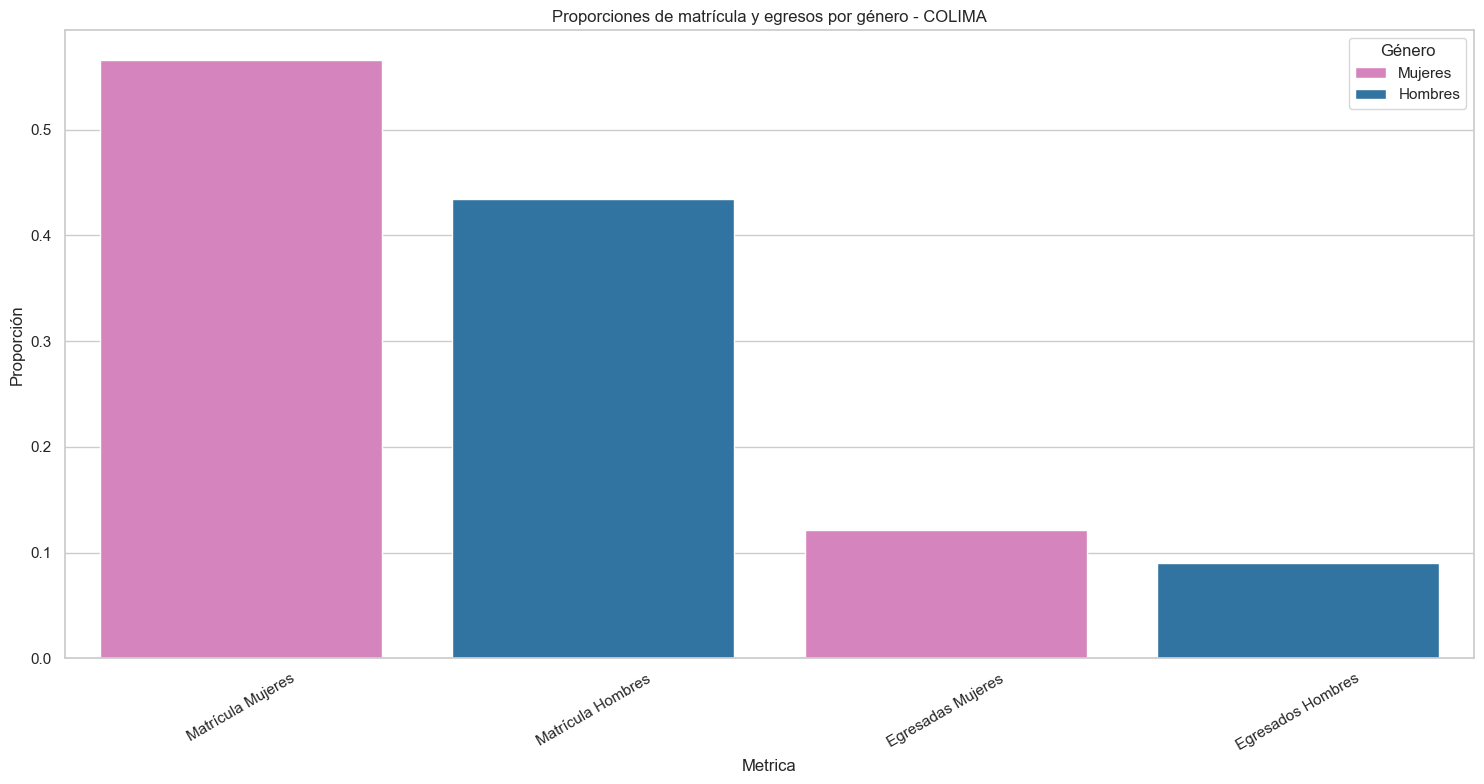


Valores de proporción - DURANGO:
                Metrica   Genero  Proporción
9    Matrícula Mujeres  Mujeres    0.539476
41   Matrícula Hombres  Hombres    0.460524
73   Egresadas Mujeres  Mujeres    0.111020
105  Egresados Hombres  Hombres    0.088844


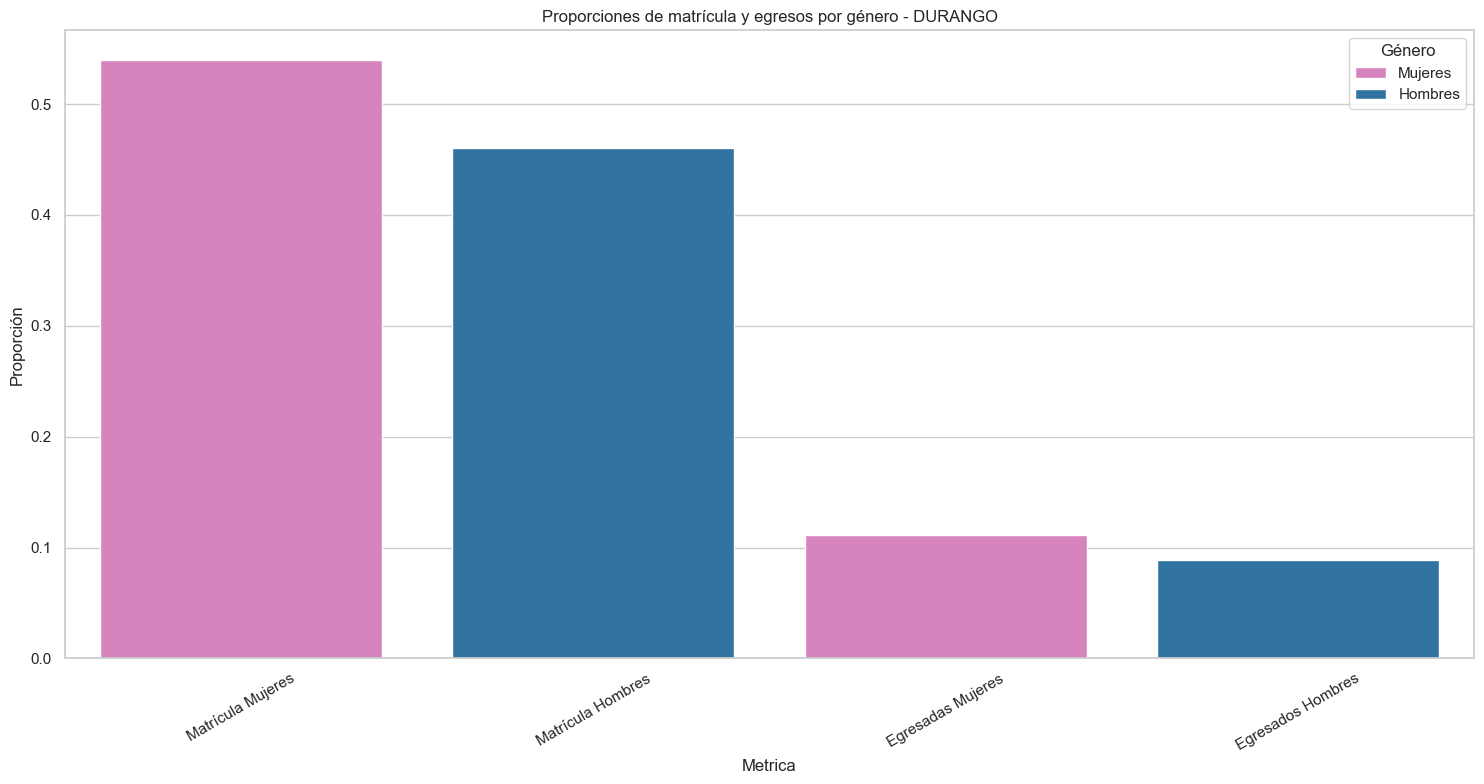


Valores de proporción - GUANAJUATO:
                Metrica   Genero  Proporción
10   Matrícula Mujeres  Mujeres    0.538548
42   Matrícula Hombres  Hombres    0.461452
74   Egresadas Mujeres  Mujeres    0.089133
106  Egresados Hombres  Hombres    0.072594


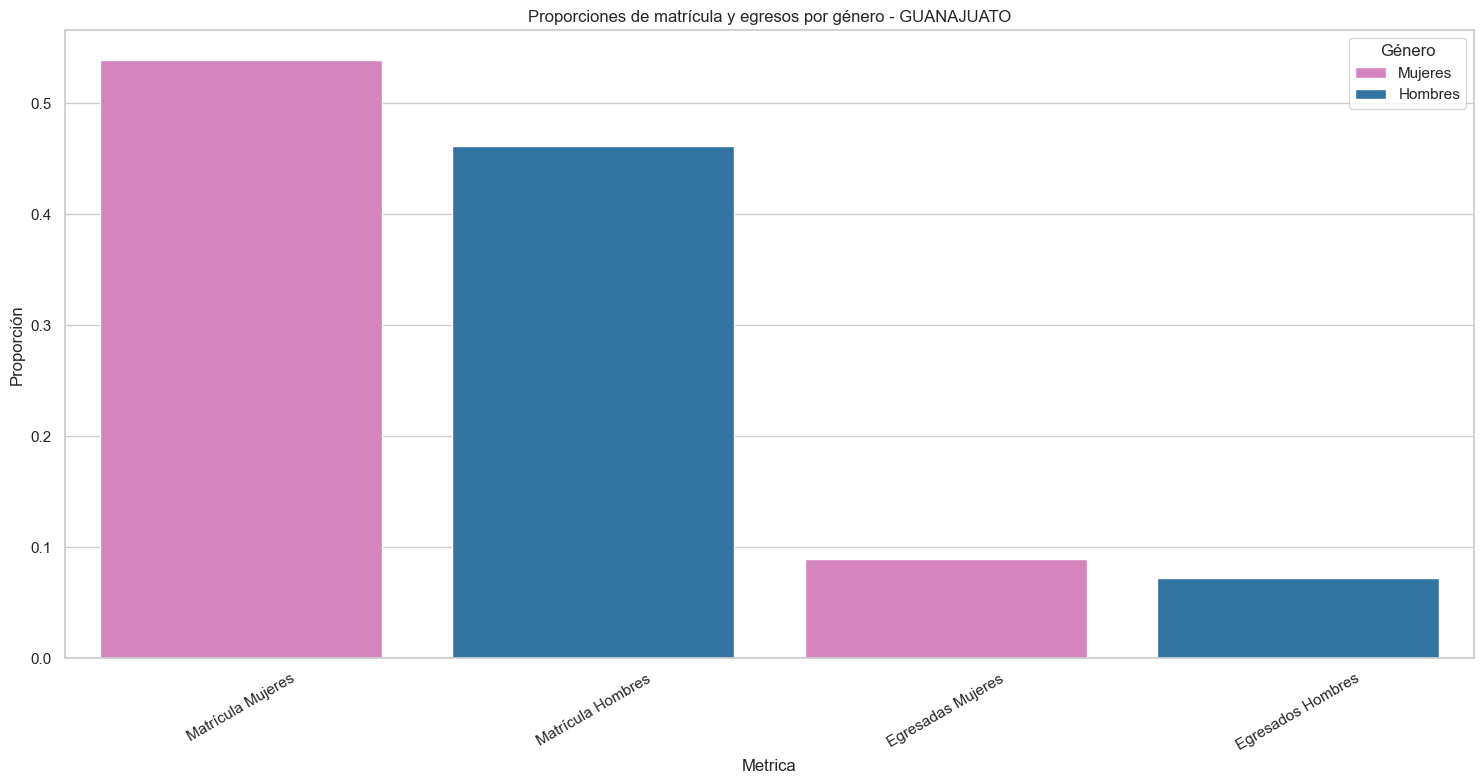


Valores de proporción - GUERRERO:
                Metrica   Genero  Proporción
11   Matrícula Mujeres  Mujeres    0.556086
43   Matrícula Hombres  Hombres    0.443914
75   Egresadas Mujeres  Mujeres    0.125759
107  Egresados Hombres  Hombres    0.087047


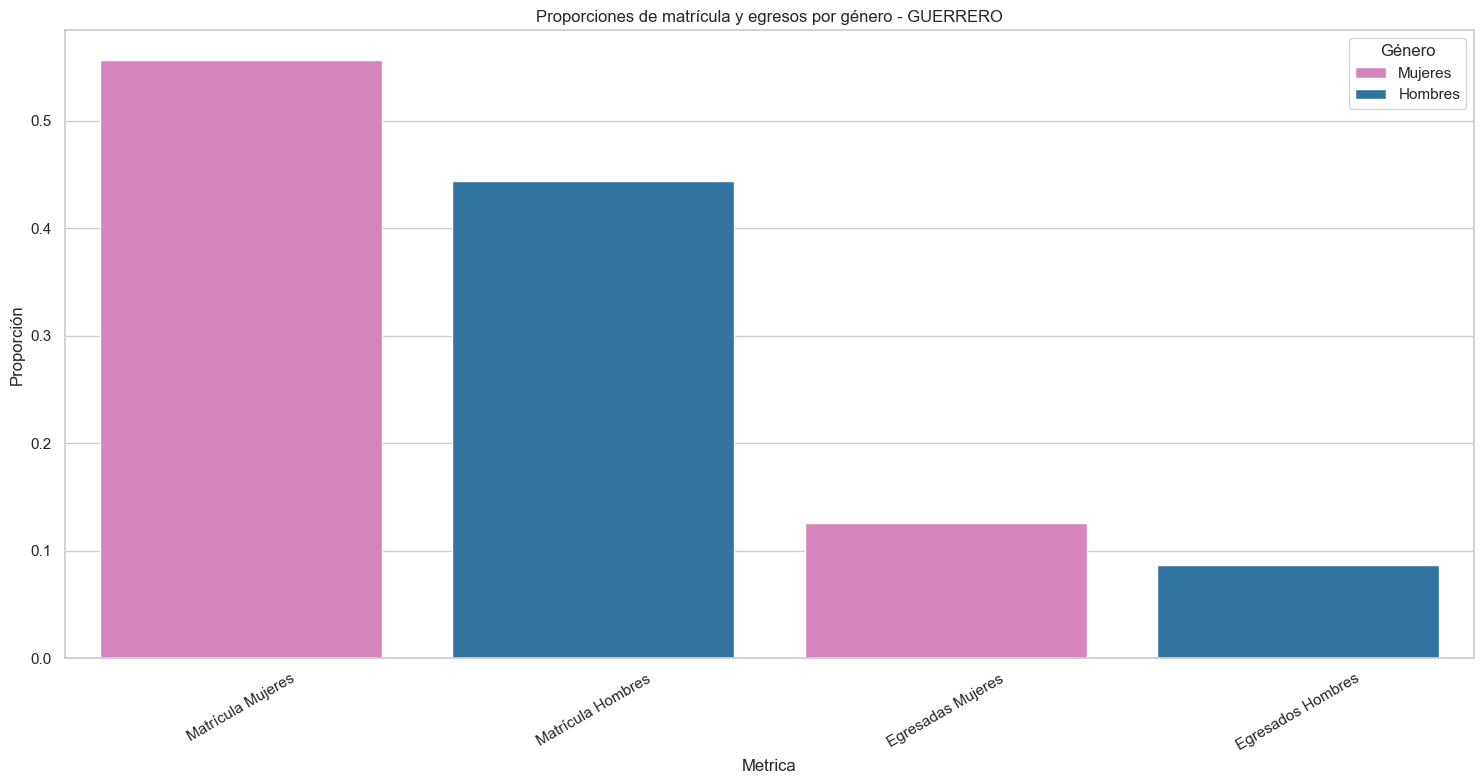


Valores de proporción - HIDALGO:
                Metrica   Genero  Proporción
12   Matrícula Mujeres  Mujeres    0.549480
44   Matrícula Hombres  Hombres    0.450520
76   Egresadas Mujeres  Mujeres    0.123076
108  Egresados Hombres  Hombres    0.091254


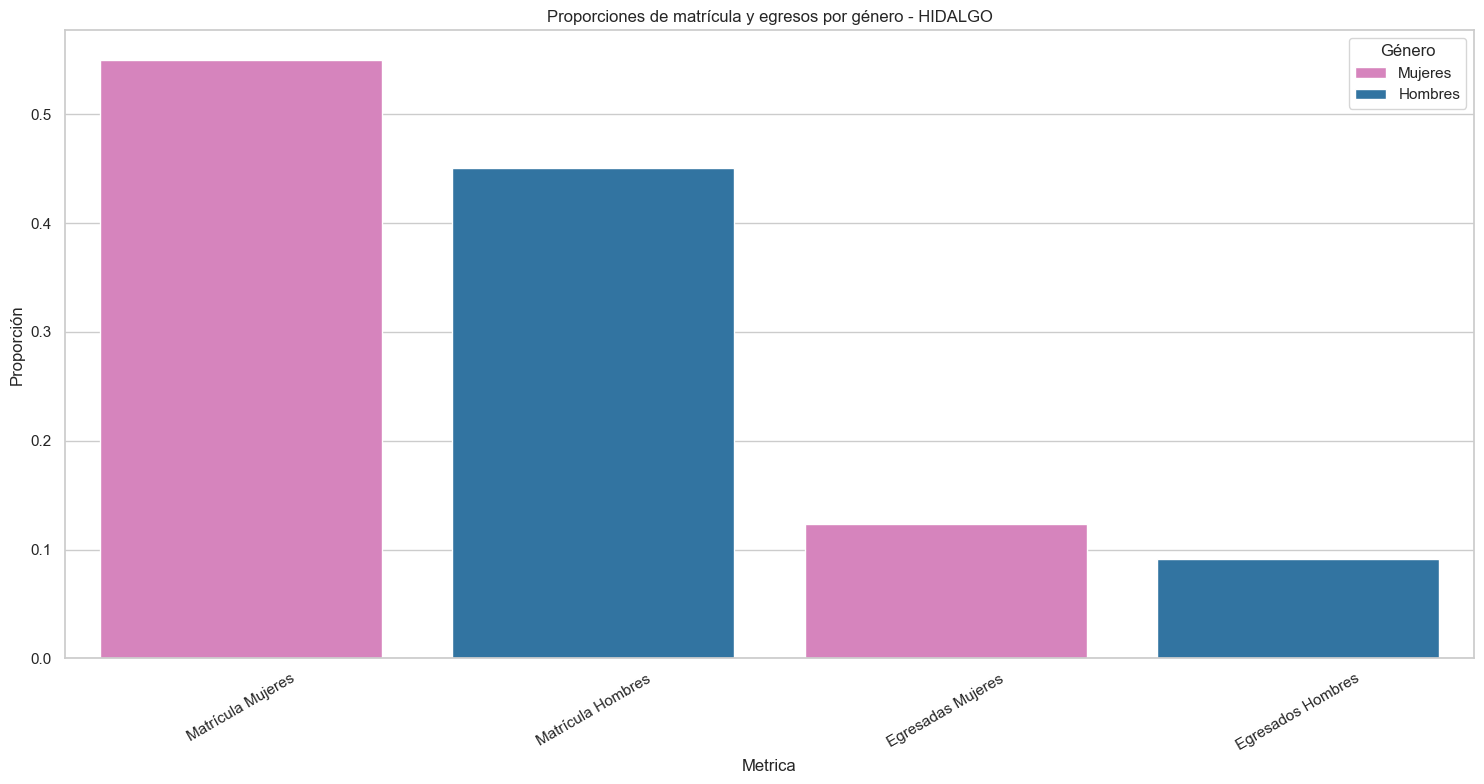


Valores de proporción - JALISCO:
                Metrica   Genero  Proporción
13   Matrícula Mujeres  Mujeres    0.547010
45   Matrícula Hombres  Hombres    0.452990
77   Egresadas Mujeres  Mujeres    0.111972
109  Egresados Hombres  Hombres    0.086546


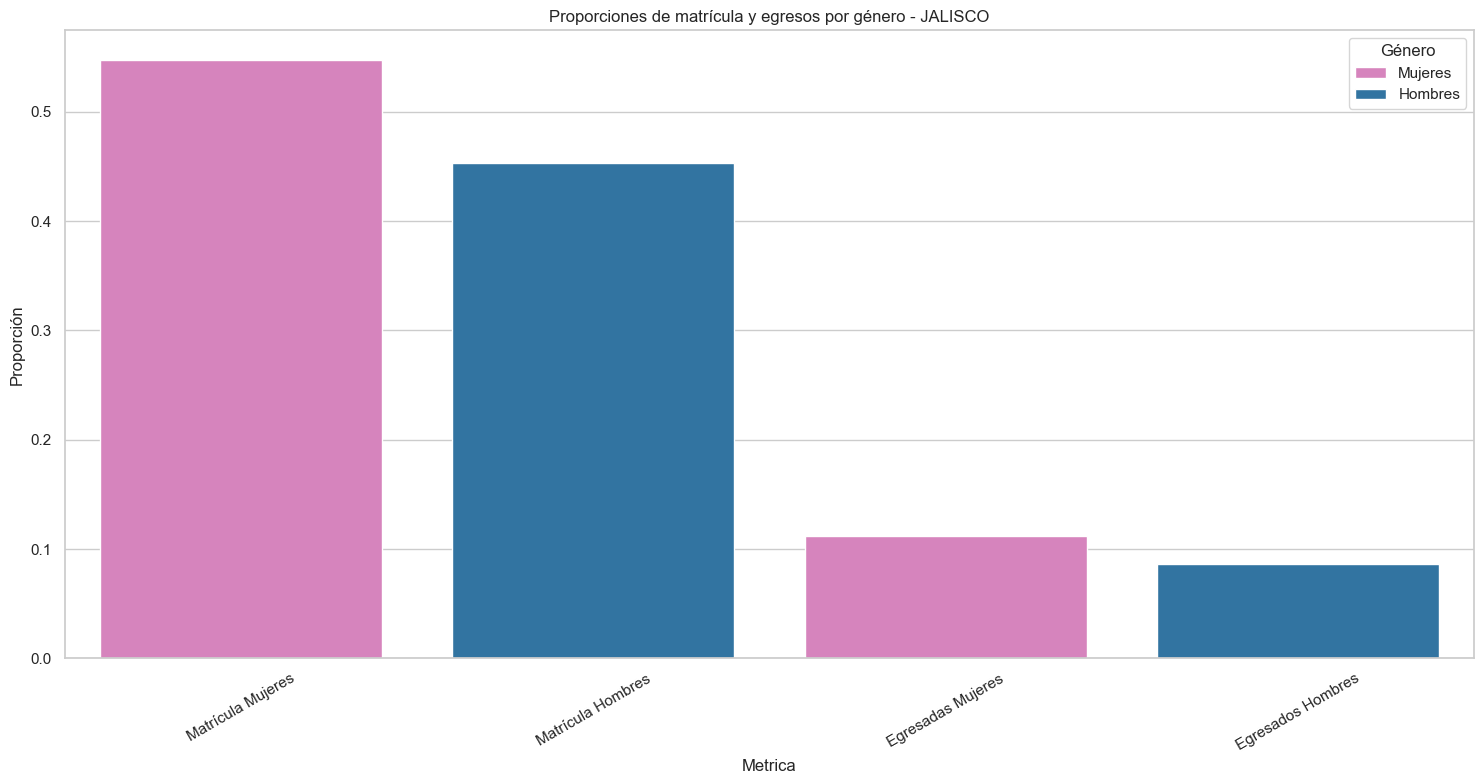


Valores de proporción - MÉXICO:
                Metrica   Genero  Proporción
14   Matrícula Mujeres  Mujeres    0.544512
46   Matrícula Hombres  Hombres    0.455488
78   Egresadas Mujeres  Mujeres    0.102707
110  Egresados Hombres  Hombres    0.075461


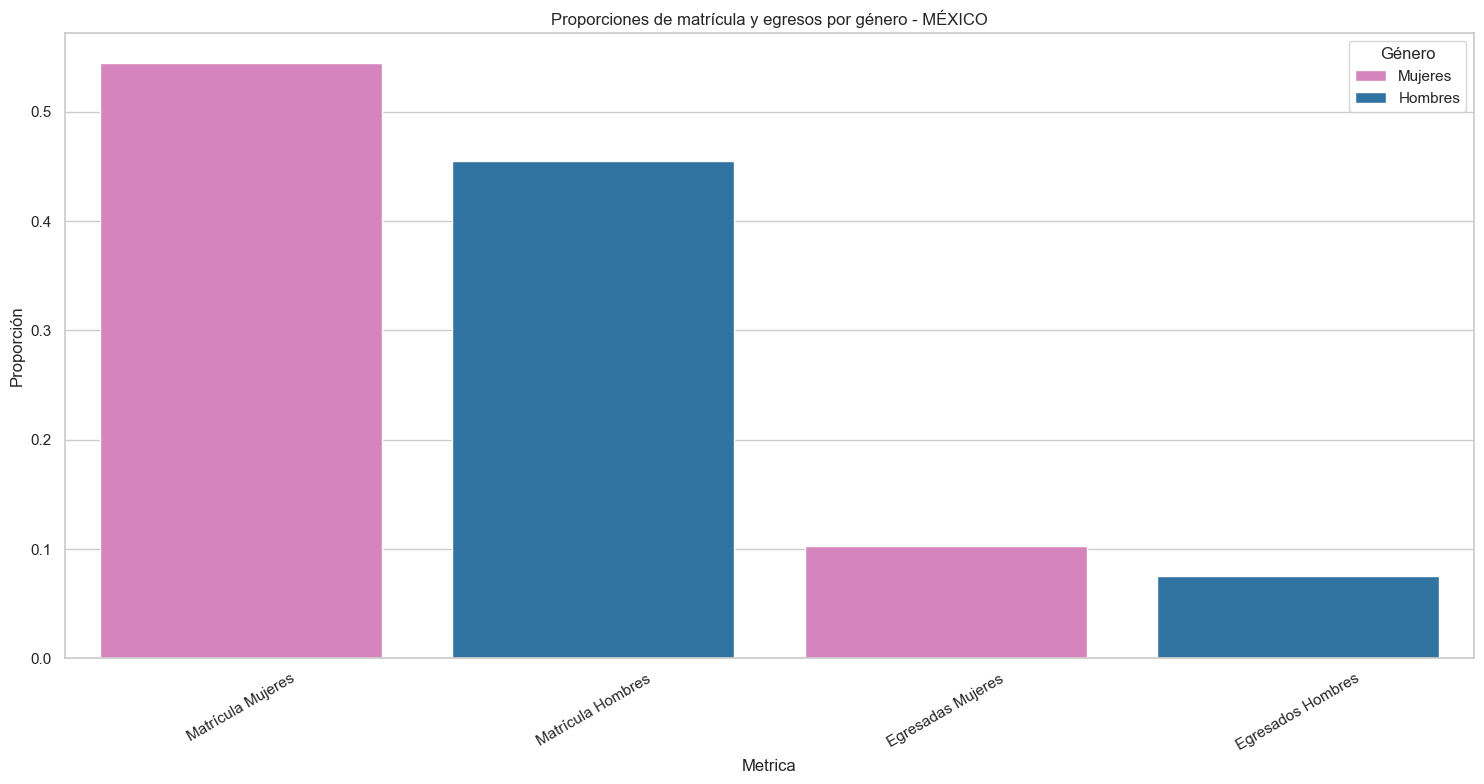


Valores de proporción - MICHOACÁN:
                Metrica   Genero  Proporción
15   Matrícula Mujeres  Mujeres    0.552354
47   Matrícula Hombres  Hombres    0.447646
79   Egresadas Mujeres  Mujeres    0.108613
111  Egresados Hombres  Hombres    0.077209


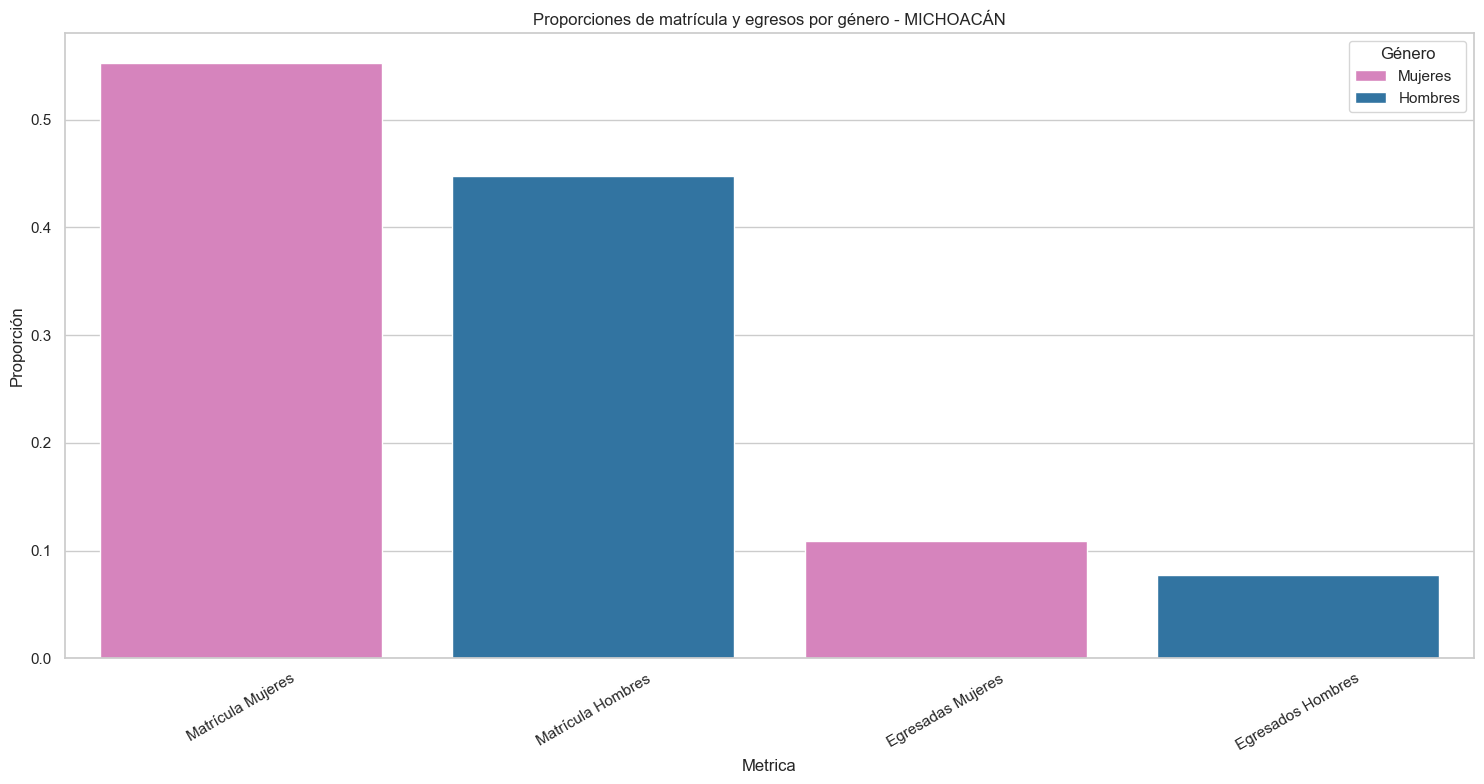


Valores de proporción - MORELOS:
                Metrica   Genero  Proporción
16   Matrícula Mujeres  Mujeres    0.542907
48   Matrícula Hombres  Hombres    0.457093
80   Egresadas Mujeres  Mujeres    0.122605
112  Egresados Hombres  Hombres    0.095086


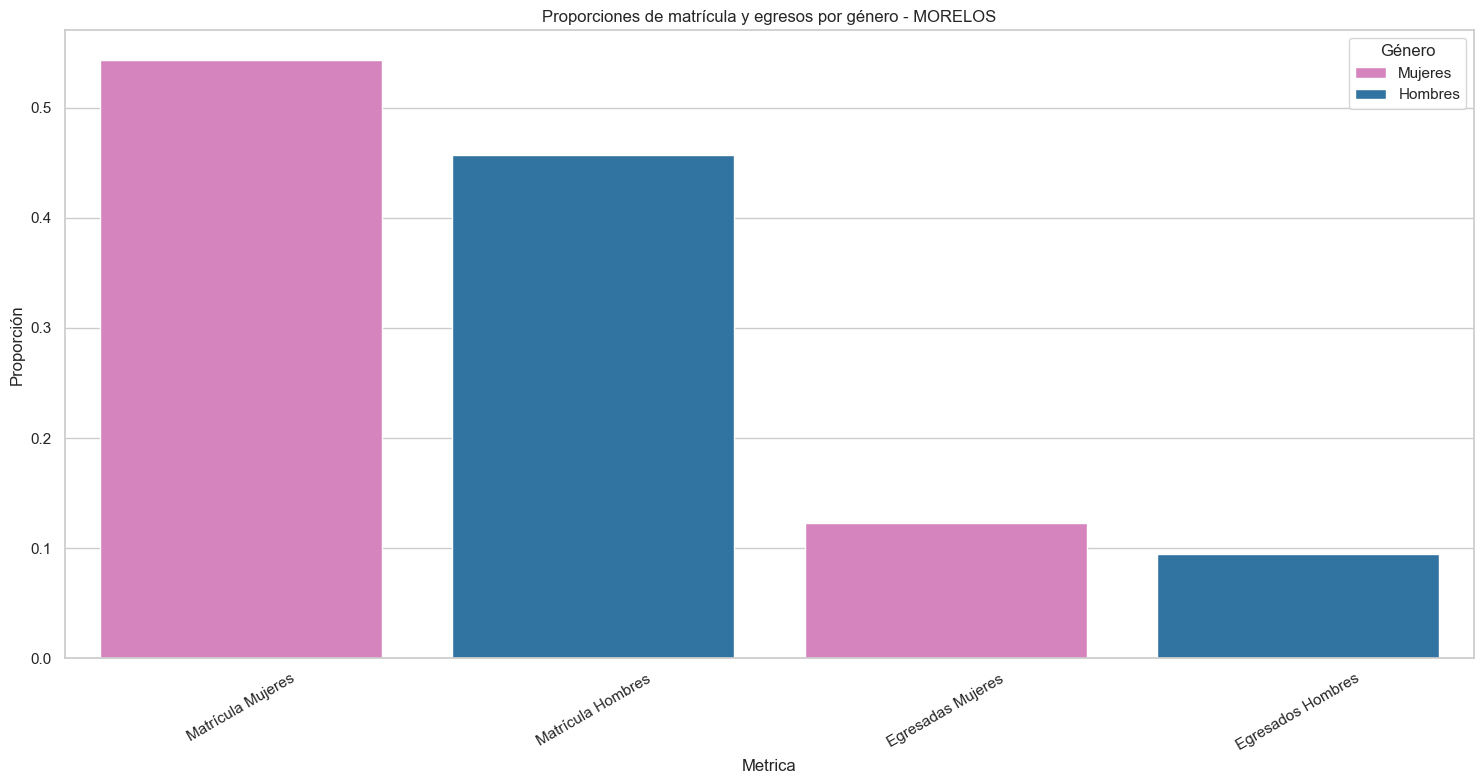


Valores de proporción - NAYARIT:
                Metrica   Genero  Proporción
17   Matrícula Mujeres  Mujeres    0.577381
49   Matrícula Hombres  Hombres    0.422619
81   Egresadas Mujeres  Mujeres    0.146452
113  Egresados Hombres  Hombres    0.091518


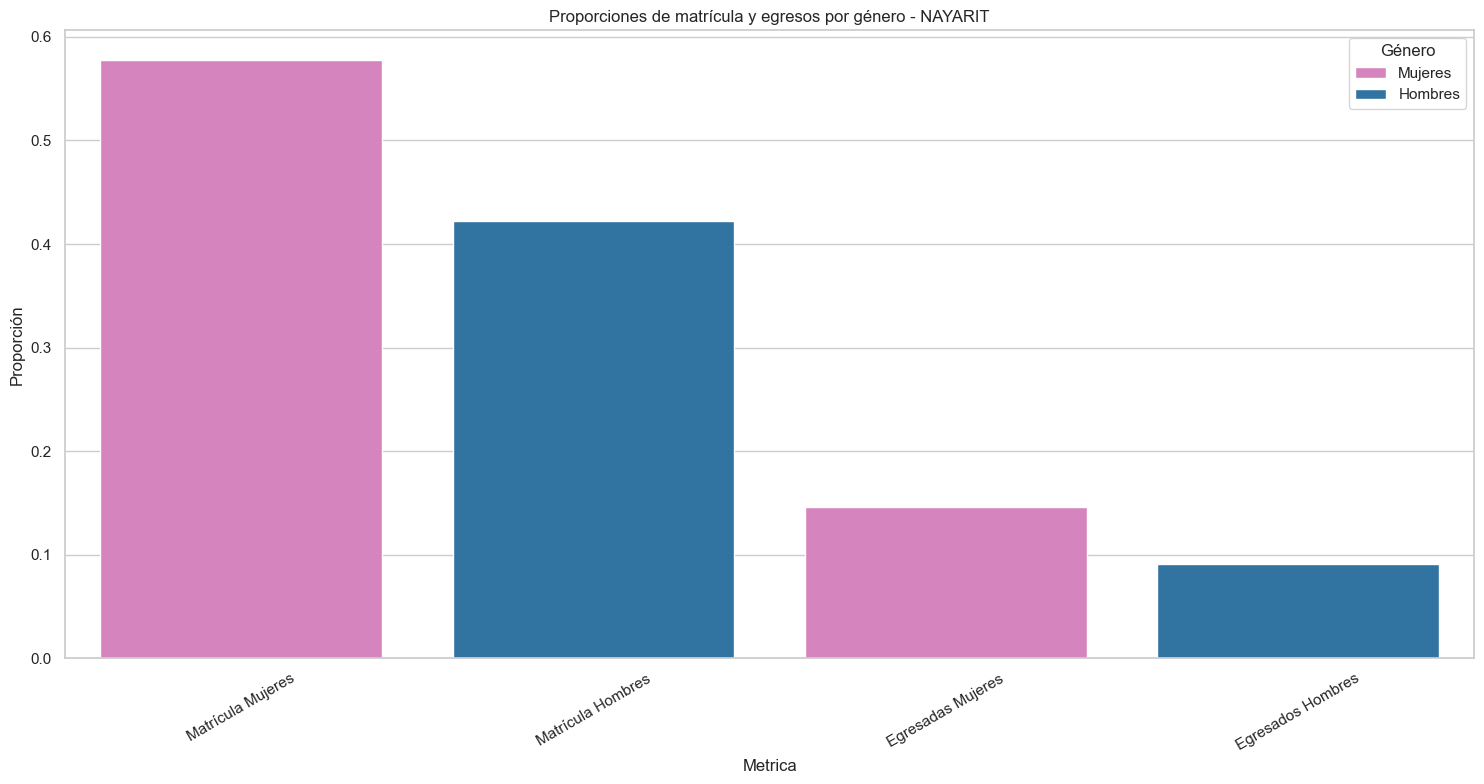


Valores de proporción - NUEVO LEÓN:
                Metrica   Genero  Proporción
18   Matrícula Mujeres  Mujeres    0.514544
50   Matrícula Hombres  Hombres    0.485456
82   Egresadas Mujeres  Mujeres    0.092797
114  Egresados Hombres  Hombres    0.081081


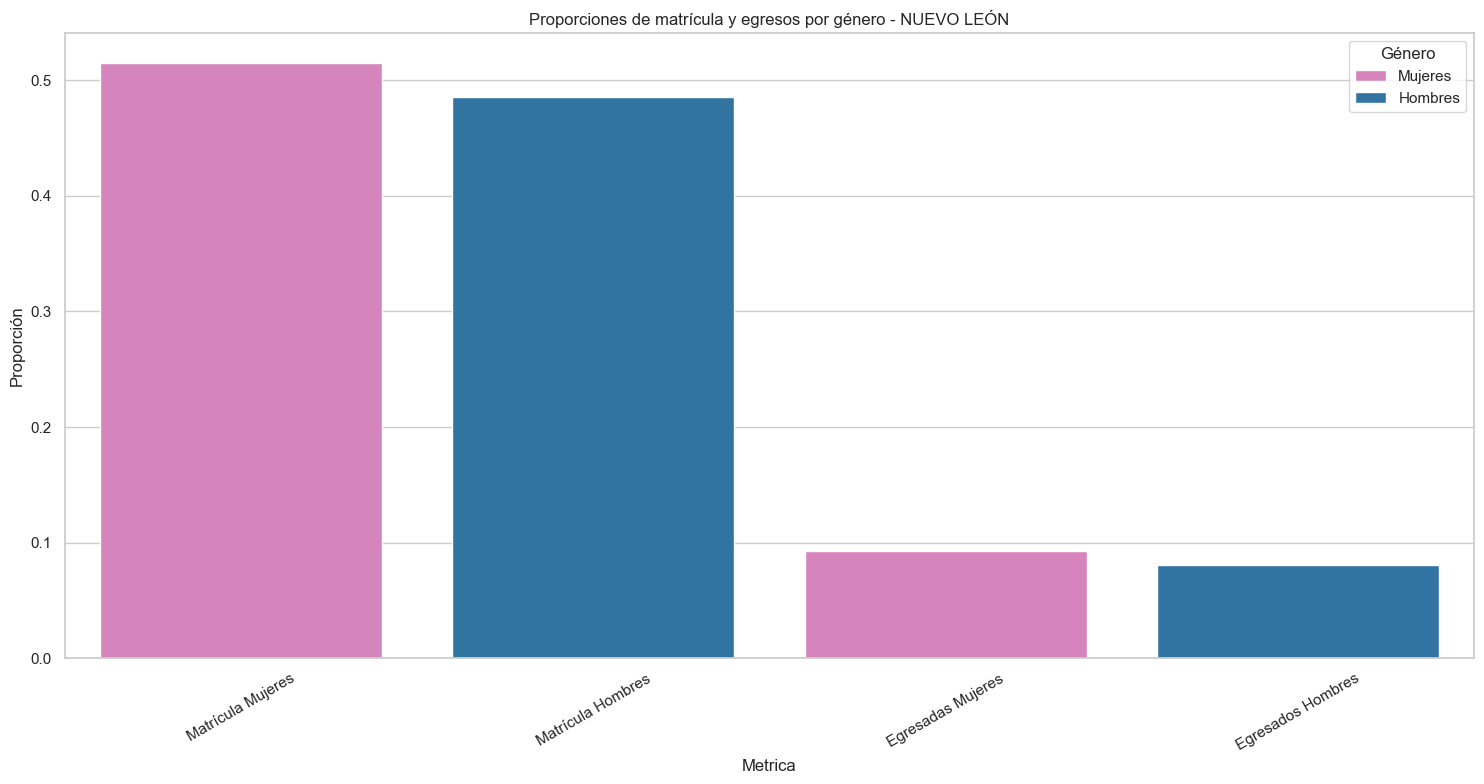


Valores de proporción - OAXACA:
                Metrica   Genero  Proporción
19   Matrícula Mujeres  Mujeres    0.556785
51   Matrícula Hombres  Hombres    0.443215
83   Egresadas Mujeres  Mujeres    0.102929
115  Egresados Hombres  Hombres    0.067592


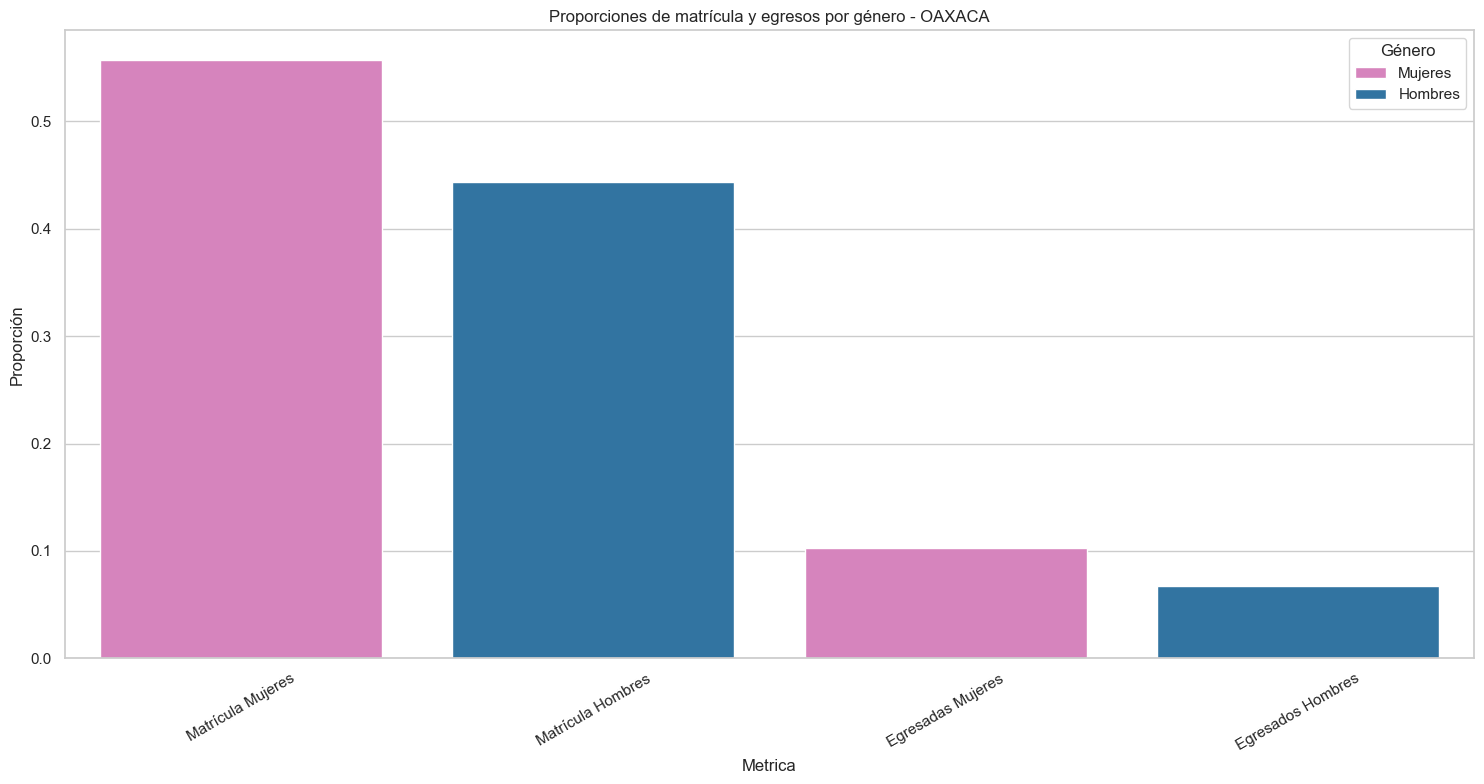


Valores de proporción - PUEBLA:
                Metrica   Genero  Proporción
20   Matrícula Mujeres  Mujeres    0.555225
52   Matrícula Hombres  Hombres    0.444775
84   Egresadas Mujeres  Mujeres    0.109317
116  Egresados Hombres  Hombres    0.078709


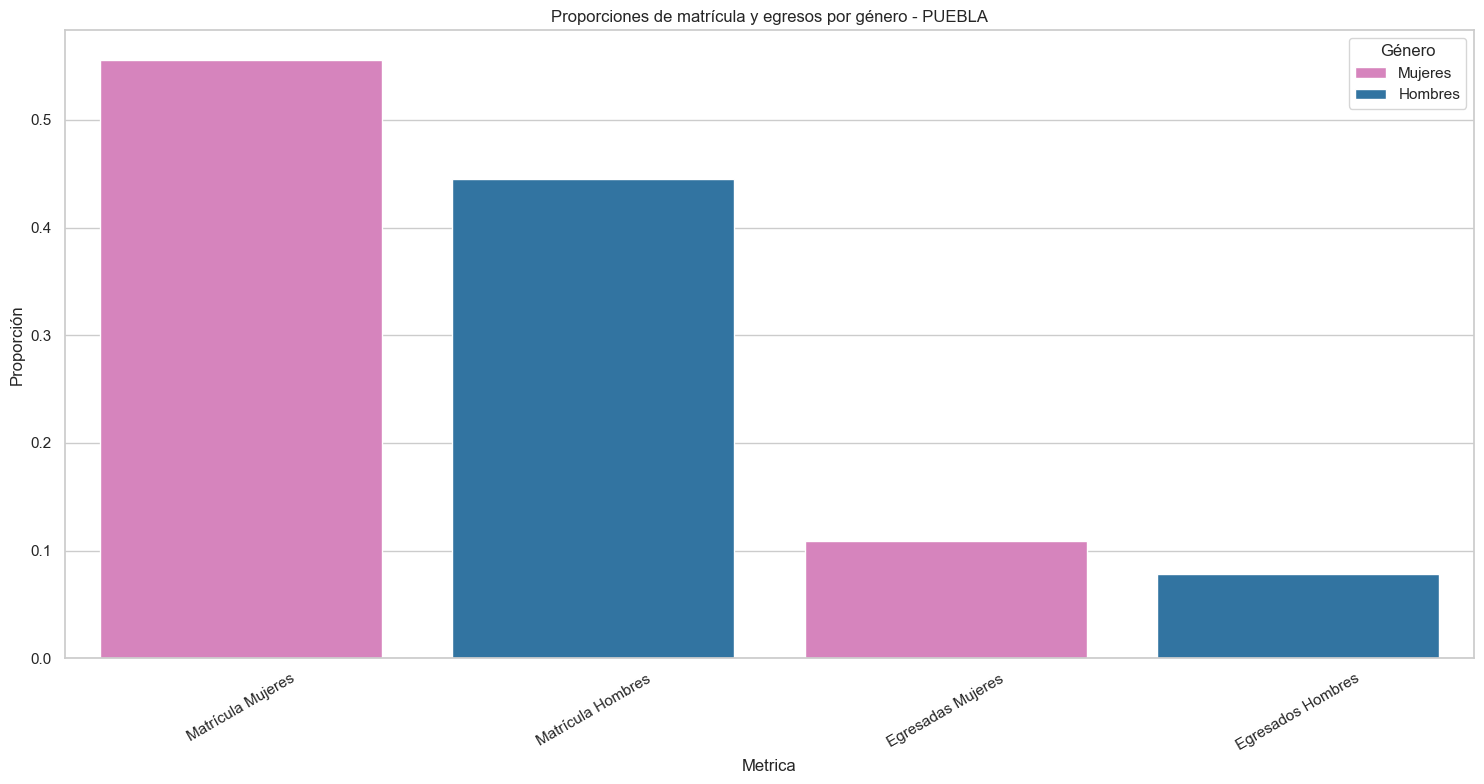


Valores de proporción - QUERÉTARO:
                Metrica   Genero  Proporción
21   Matrícula Mujeres  Mujeres    0.546076
53   Matrícula Hombres  Hombres    0.453924
85   Egresadas Mujeres  Mujeres    0.120151
117  Egresados Hombres  Hombres    0.096152


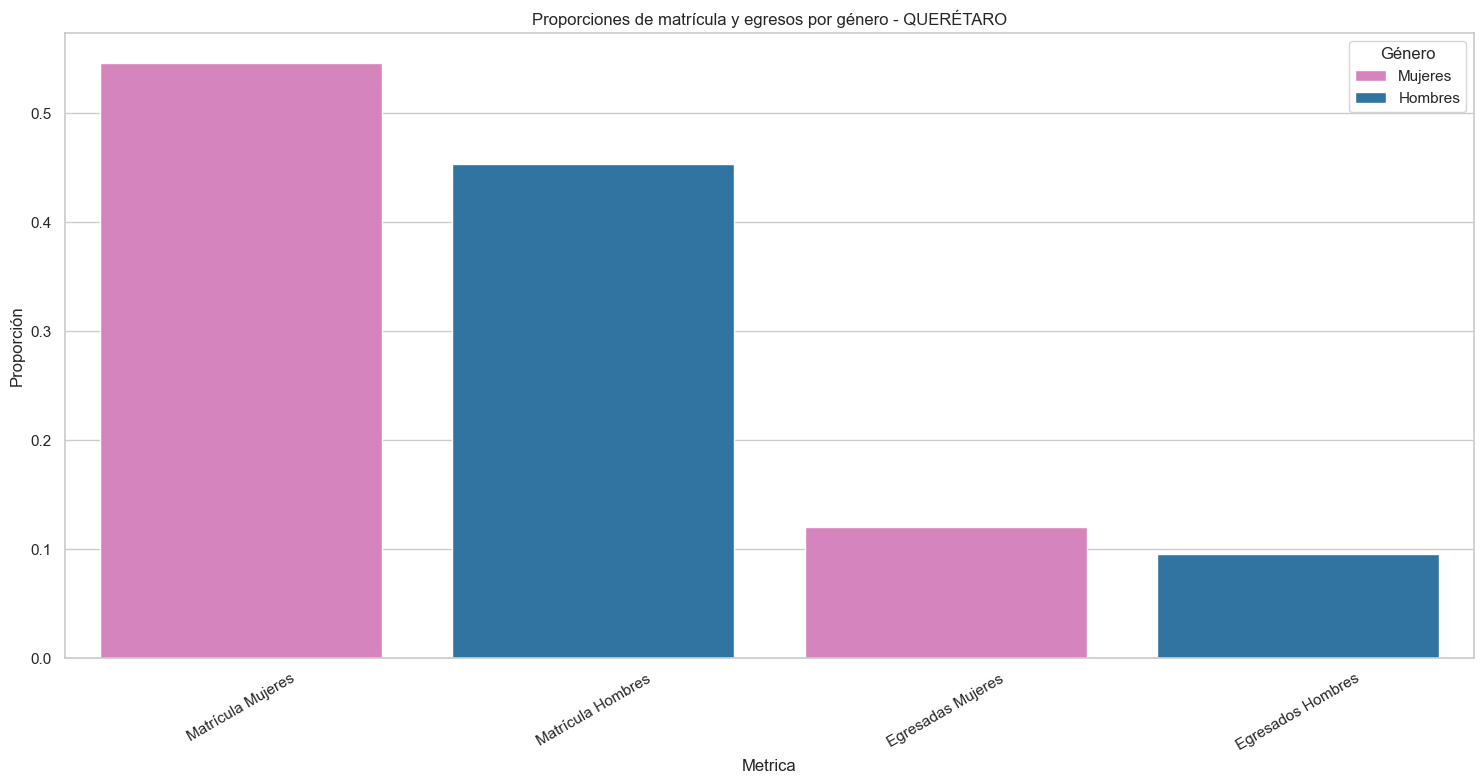


Valores de proporción - QUINTANA ROO:
                Metrica   Genero  Proporción
22   Matrícula Mujeres  Mujeres    0.535146
54   Matrícula Hombres  Hombres    0.464854
86   Egresadas Mujeres  Mujeres    0.100085
118  Egresados Hombres  Hombres    0.077280


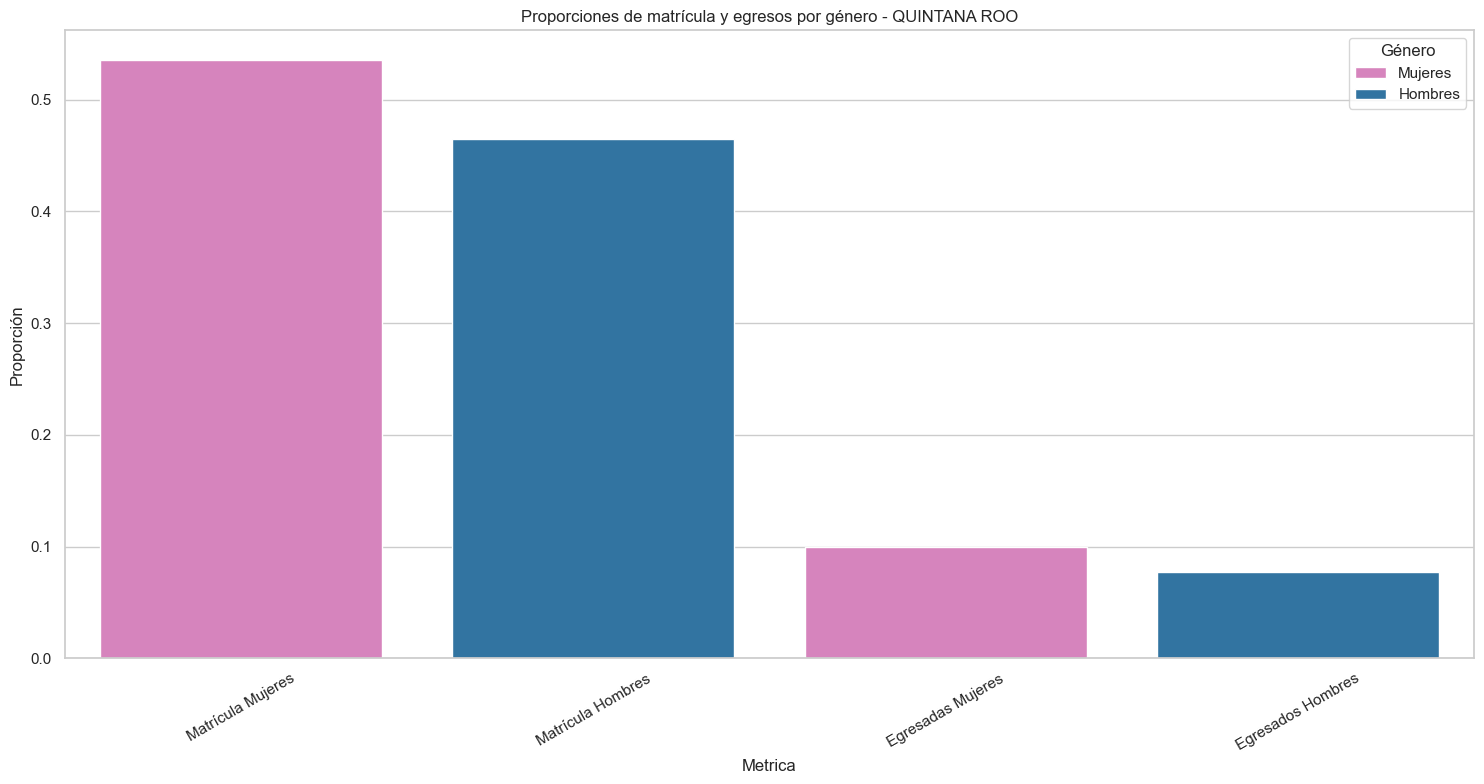


Valores de proporción - SAN LUIS POTOSÍ:
                Metrica   Genero  Proporción
23   Matrícula Mujeres  Mujeres    0.538649
55   Matrícula Hombres  Hombres    0.461351
87   Egresadas Mujeres  Mujeres    0.107105
119  Egresados Hombres  Hombres    0.078855


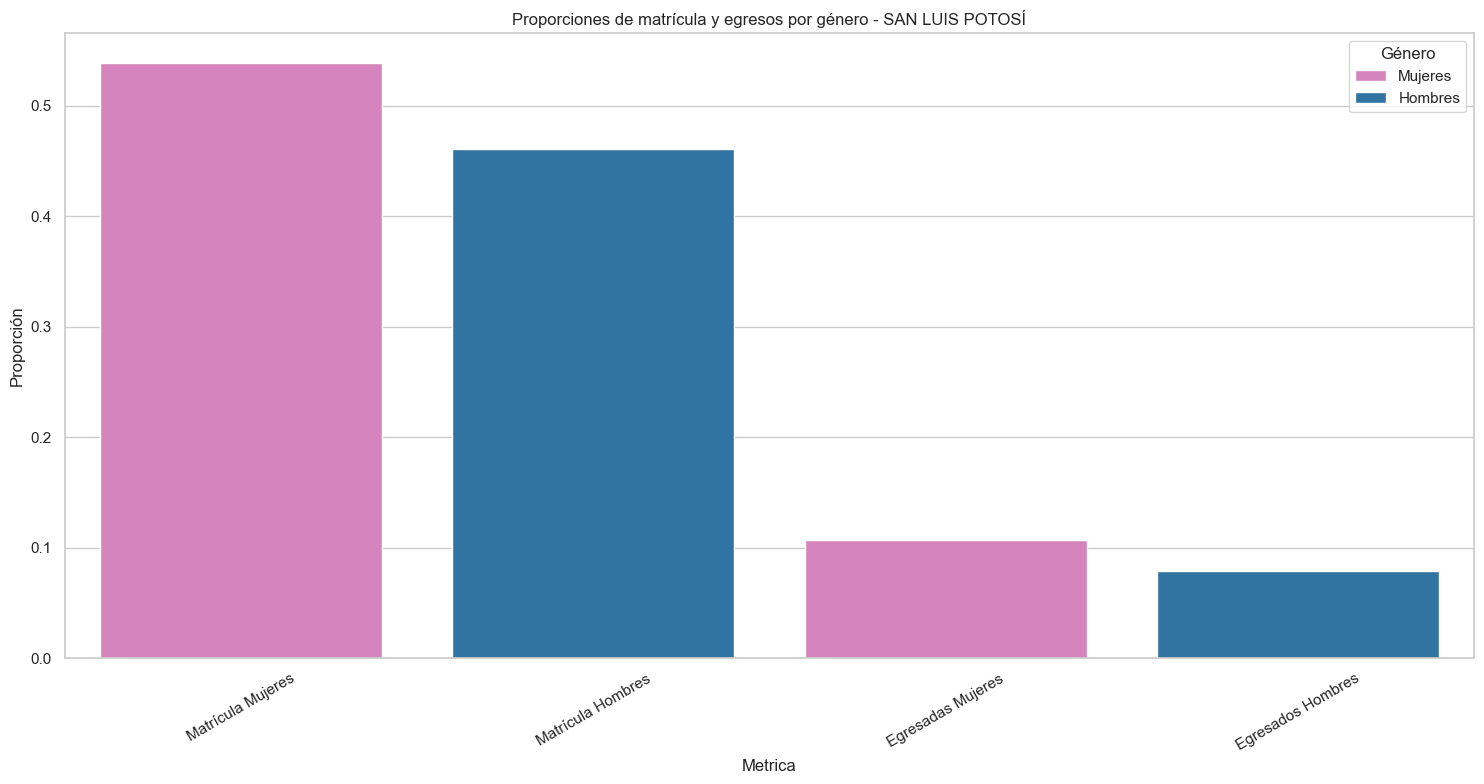


Valores de proporción - SINALOA:
                Metrica   Genero  Proporción
24   Matrícula Mujeres  Mujeres    0.560734
56   Matrícula Hombres  Hombres    0.439266
88   Egresadas Mujeres  Mujeres    0.096386
120  Egresados Hombres  Hombres    0.063429


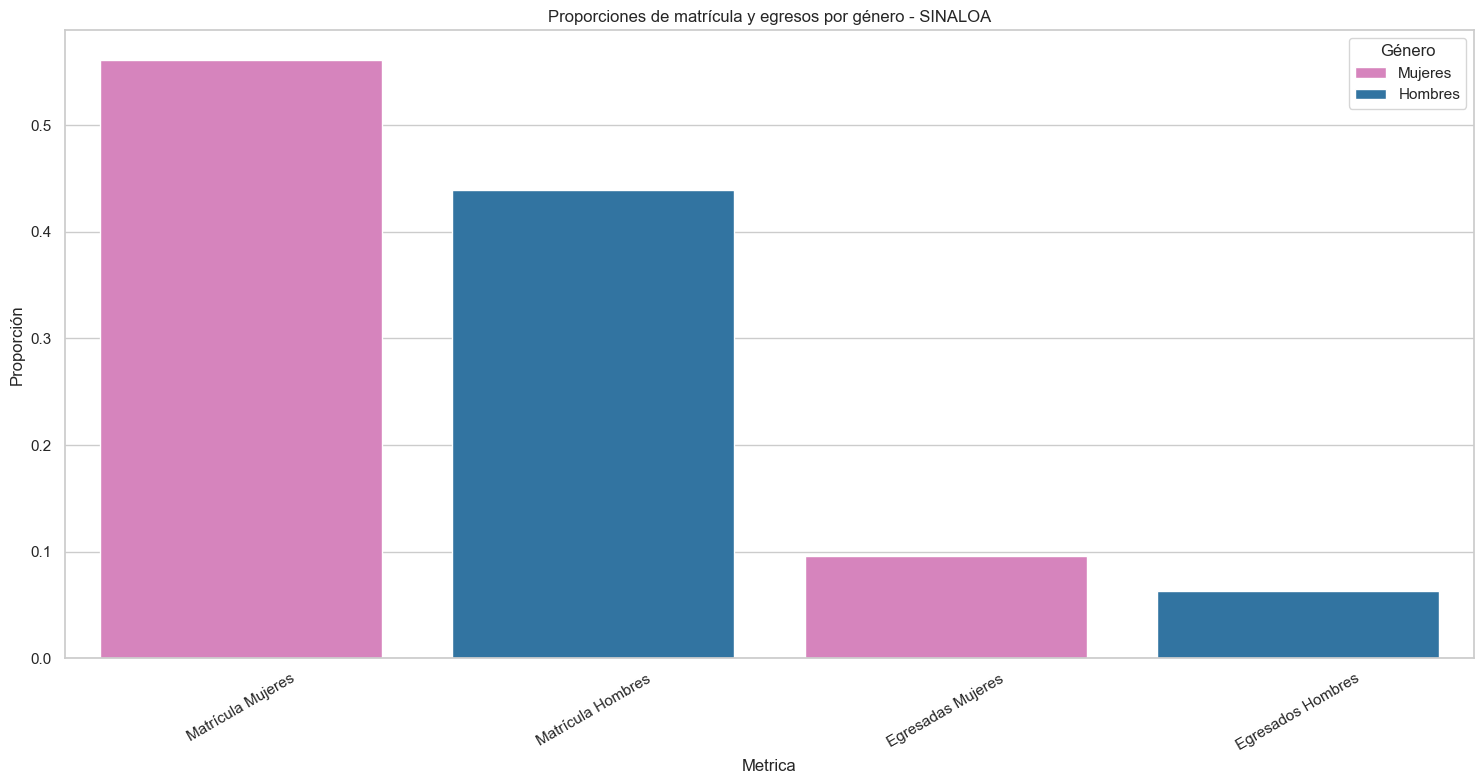


Valores de proporción - SONORA:
                Metrica   Genero  Proporción
25   Matrícula Mujeres  Mujeres    0.537419
57   Matrícula Hombres  Hombres    0.462581
89   Egresadas Mujeres  Mujeres    0.102431
121  Egresados Hombres  Hombres    0.069052


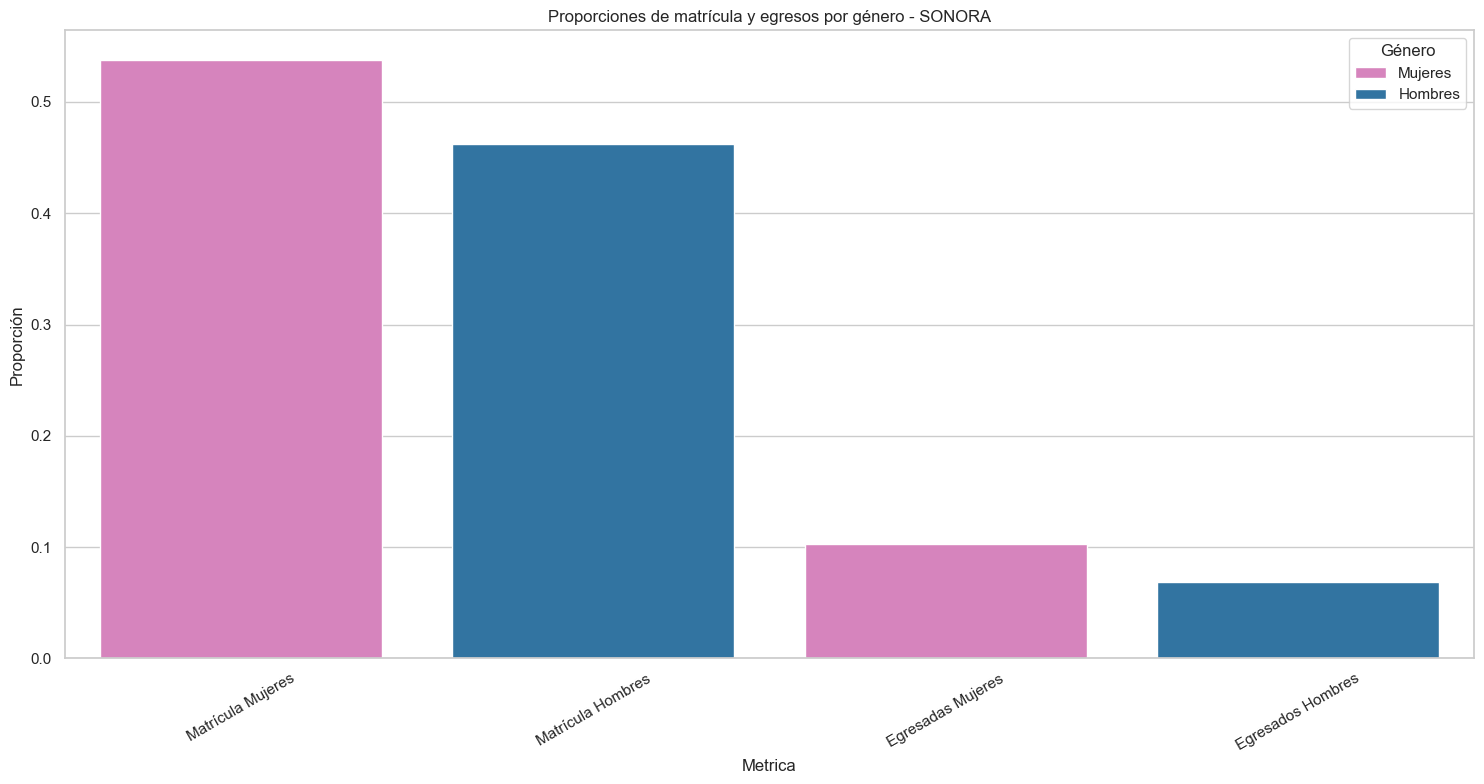


Valores de proporción - TABASCO:
                Metrica   Genero  Proporción
26   Matrícula Mujeres  Mujeres    0.529011
58   Matrícula Hombres  Hombres    0.470989
90   Egresadas Mujeres  Mujeres    0.103925
122  Egresados Hombres  Hombres    0.083264


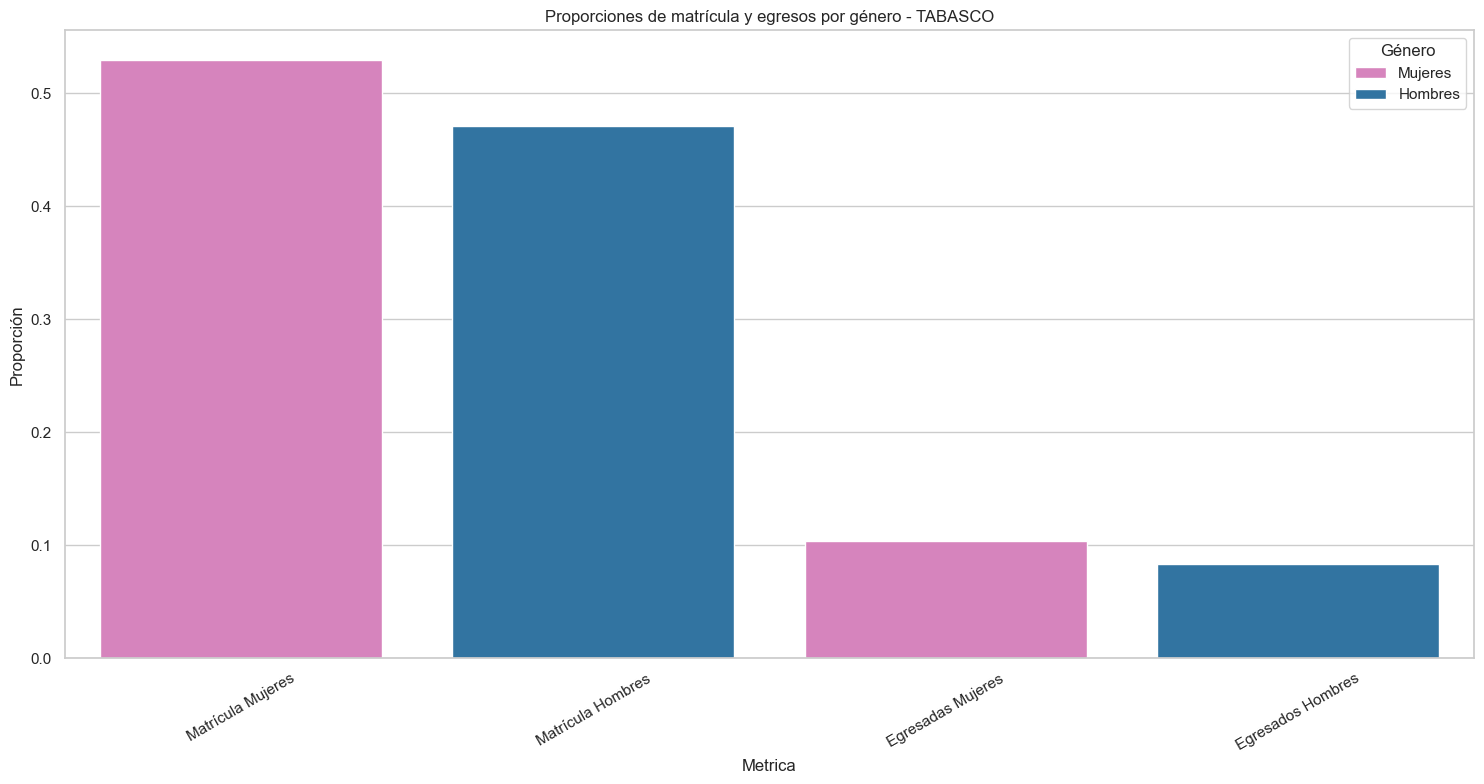


Valores de proporción - TAMAULIPAS:
                Metrica   Genero  Proporción
27   Matrícula Mujeres  Mujeres    0.543751
59   Matrícula Hombres  Hombres    0.456249
91   Egresadas Mujeres  Mujeres    0.126582
123  Egresados Hombres  Hombres    0.088751


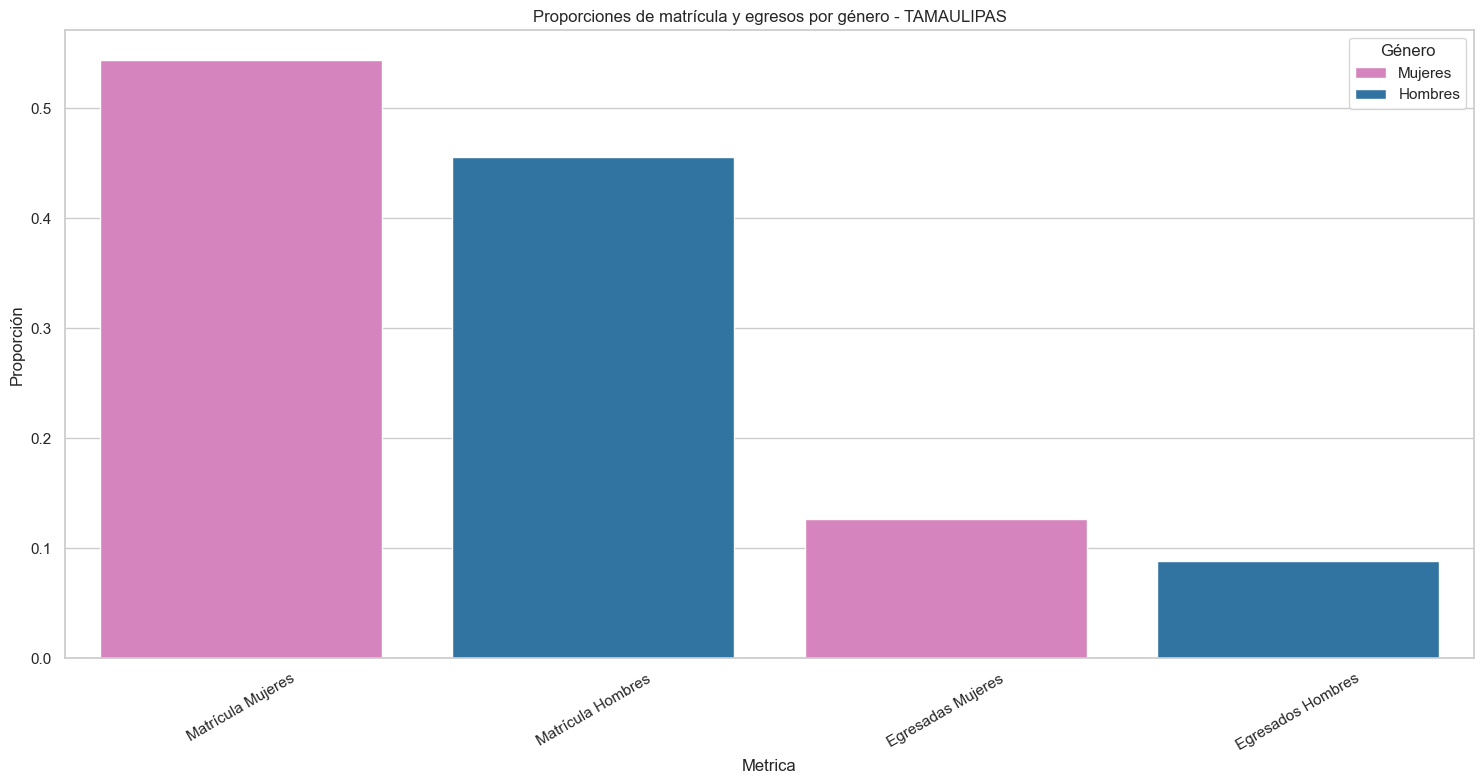


Valores de proporción - TLAXCALA:
                Metrica   Genero  Proporción
28   Matrícula Mujeres  Mujeres    0.550156
60   Matrícula Hombres  Hombres    0.449844
92   Egresadas Mujeres  Mujeres    0.105220
124  Egresados Hombres  Hombres    0.070840


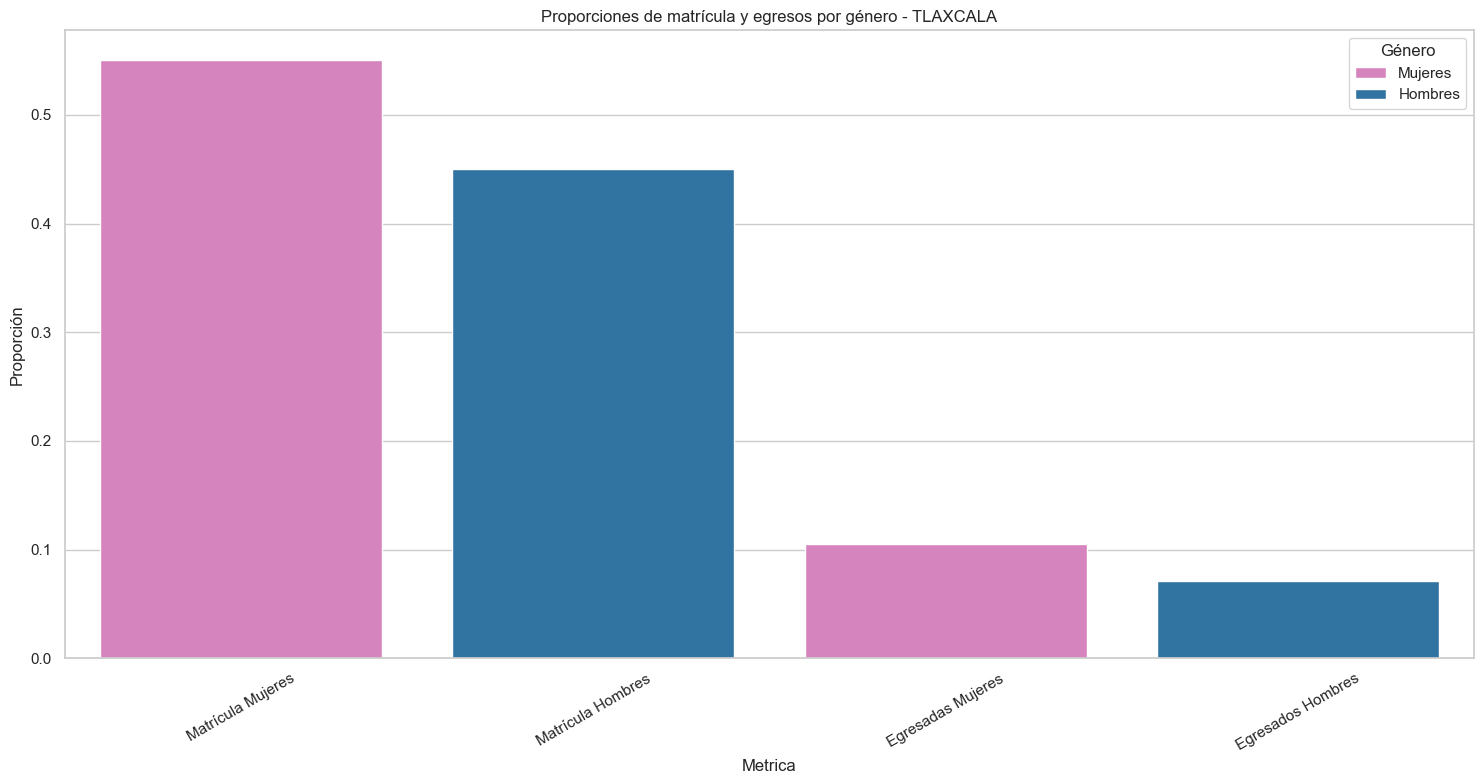


Valores de proporción - VERACRUZ:
                Metrica   Genero  Proporción
29   Matrícula Mujeres  Mujeres    0.538122
61   Matrícula Hombres  Hombres    0.461878
93   Egresadas Mujeres  Mujeres    0.104665
125  Egresados Hombres  Hombres    0.078165


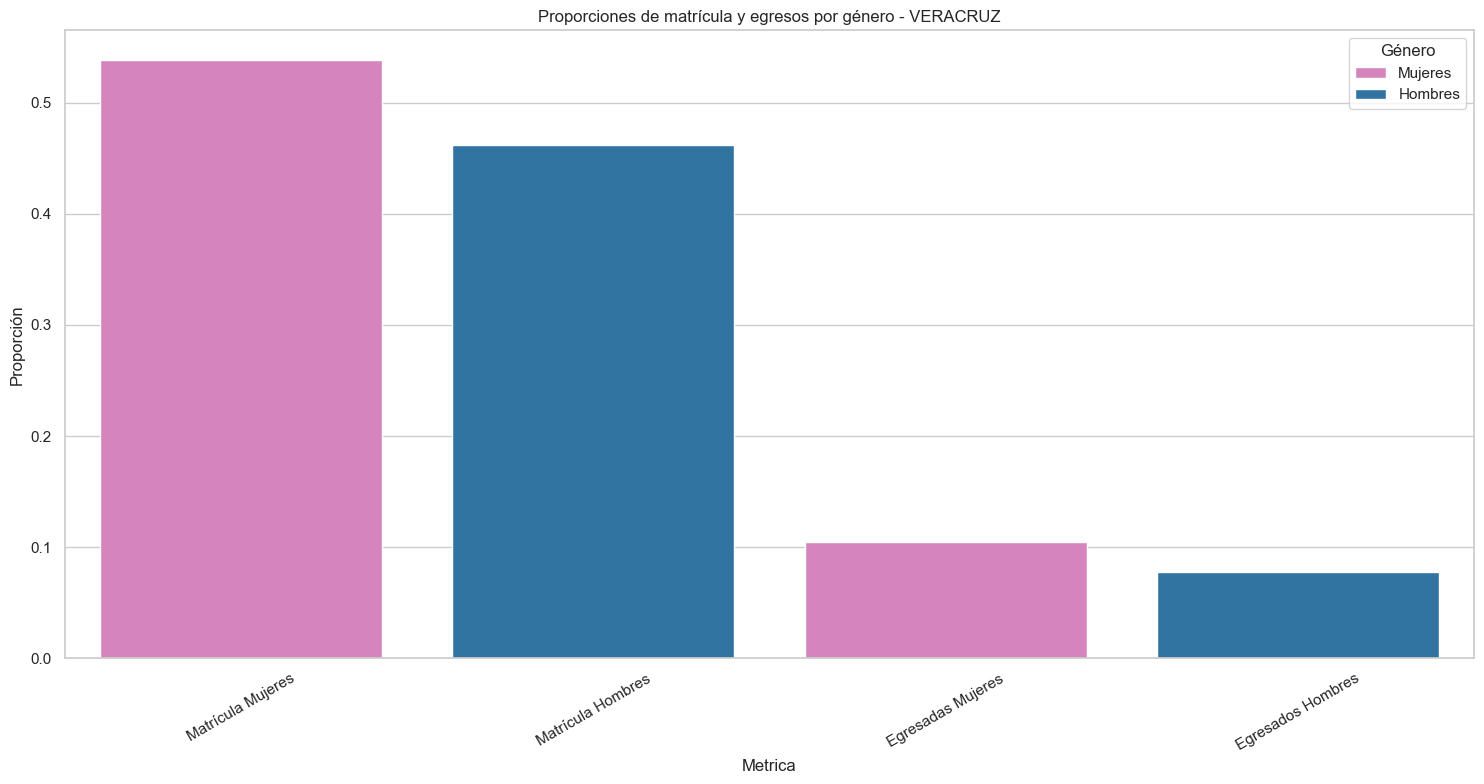


Valores de proporción - YUCATÁN:
                Metrica   Genero  Proporción
30   Matrícula Mujeres  Mujeres    0.524342
62   Matrícula Hombres  Hombres    0.475658
94   Egresadas Mujeres  Mujeres    0.108824
126  Egresados Hombres  Hombres    0.089459


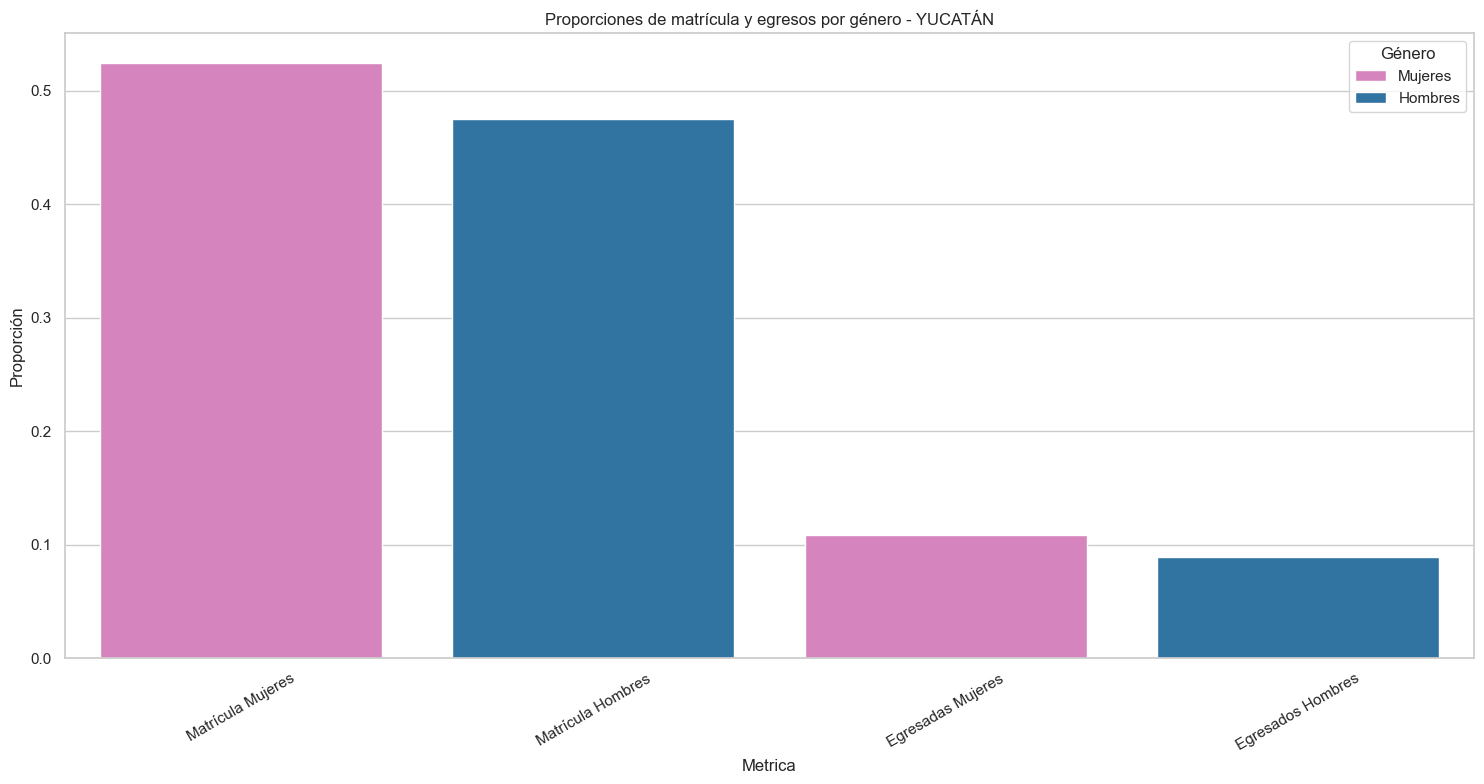


Valores de proporción - ZACATECAS:
                Metrica   Genero  Proporción
31   Matrícula Mujeres  Mujeres    0.562071
63   Matrícula Hombres  Hombres    0.437929
95   Egresadas Mujeres  Mujeres    0.114411
127  Egresados Hombres  Hombres    0.078953


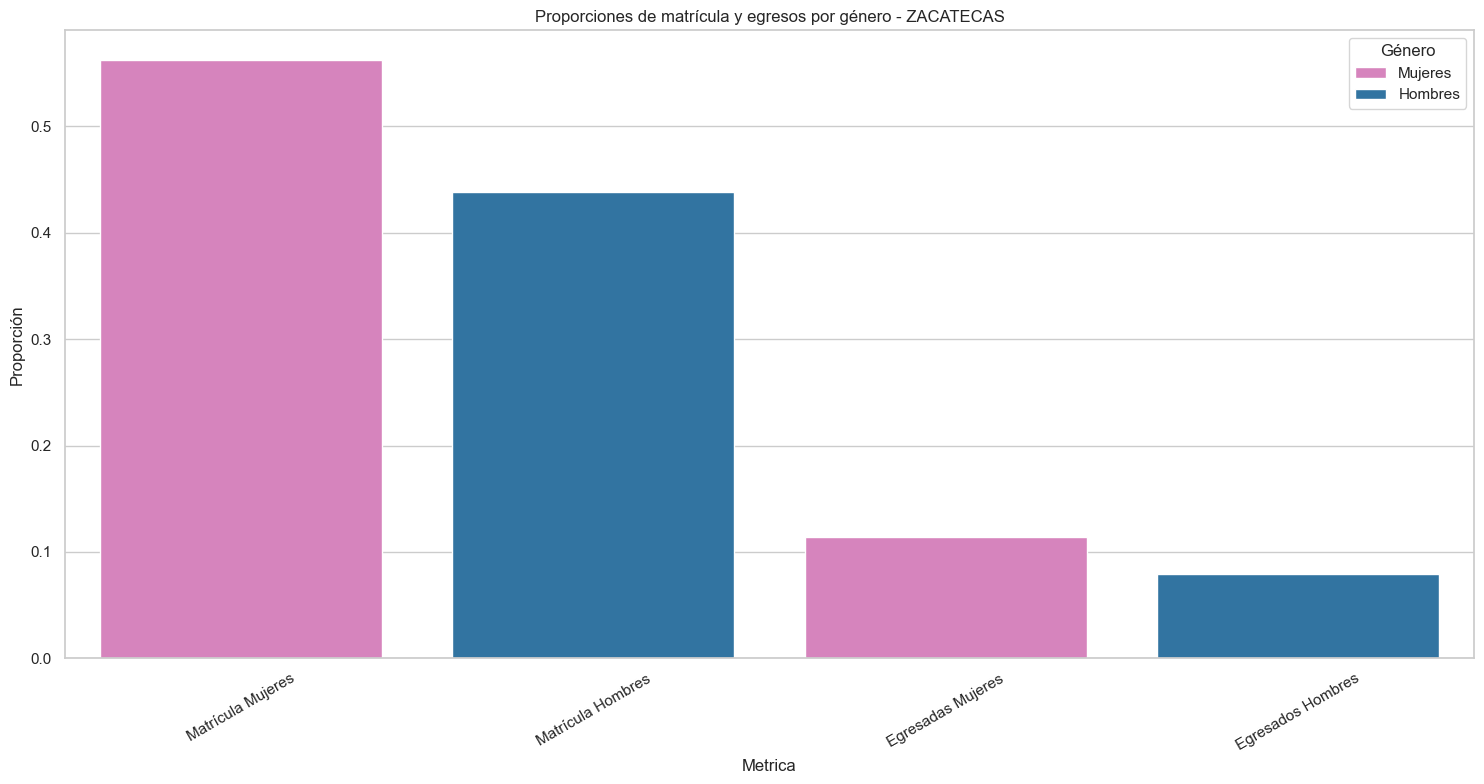

In [86]:
 # crea otro dataframe con las columnas y sus valores para realizar un barplot y sus caracteristicas
 # como definir los nombres de variable, el valor de los nombres y su id que pertenecen el data será de df_estados ya creado anteriormente.
df_genero = pd.melt(
    df_estados,
    id_vars=["estado"],
    value_vars=[
        "proporcion_matricula_mujeres",
        "proporcion_matricula_hombres",  # selecciona las columnas por analizar
        "proporcion_egresadas_mujeres",
        "proporcion_egresados_hombres"
    ],
    var_name="Metrica",
    value_name="Proporción"
)


df_genero['Genero'] = df_genero['Metrica'].apply(lambda x: 'Mujeres' if 'mujeres' in x else 'Hombres') # clasifica los hombres y mujeres y los mete a un dataframe generado anteriormente llamado df_genero

# solamente cambiamos los nombres a la hora de imprimir las metricas
nombres_amigables = {
    "proporcion_matricula_mujeres": "Matrícula Mujeres",
    "proporcion_matricula_hombres": "Matrícula Hombres",
    "proporcion_egresadas_mujeres": "Egresadas Mujeres",
    "proporcion_egresados_hombres": "Egresados Hombres"
}
df_genero['Metrica'] = df_genero['Metrica'].map(nombres_amigables) # definimos la metrica y cambiamos el mapeo por el diccionario de los nombres del df


colores = {'Hombres':'#1f77b4', 'Mujeres':'#e377c2'} # definimos los colores personalizados azul para hombre y rosa para mujer, por fines visuales


"""
crea un for que itera en la columna estado y que sea unico
después crea otro dataframe llamado df_temp para imprimir los estados después con un print

"""

for estado in df_estados['estado'].unique():  # creacion del for a iterar
    df_temp = df_genero[df_genero['estado'] == estado] # crear el df para imprimir los nombres
    print(f"\nValores de proporción - {estado}:\n", df_temp[["Metrica", "Genero", "Proporción"]] ) # imprime las metricas, proporcion, genero y su estado


    plt.figure(figsize=(15,8)) # crea el gráfico y su tamaño
    sns.barplot(x="Metrica", y="Proporción", hue="Genero", data=df_temp, palette=colores) # crea un gráfico de barras que p
    plt.title(f"Proporciones de matrícula y egresos por género - {estado}") # el titulo
    plt.ylabel("Proporción") # etiqueta Y con nombre
    plt.xticks(rotation=30) # rotación de 30 grados
    plt.legend(title="Género") # titulo de legenda
    plt.tight_layout() # acomoda los puntos
    plt.show() # lo muestra




Perfecto, ahora sí vamos a mitad de camino, por ultimo voy a realizar una matriz de correlación con el objetivo que entre la tasa de abandono, la proporción de matrículas por género y la proporción de egresos por género. Los valores van de -1 a 1, donde los números cercanos a 1 indican una correlación positiva fuerte, los cercanos a -1 una correlación negativa fuerte, y los cercanos a 0 una correlación débil o nula

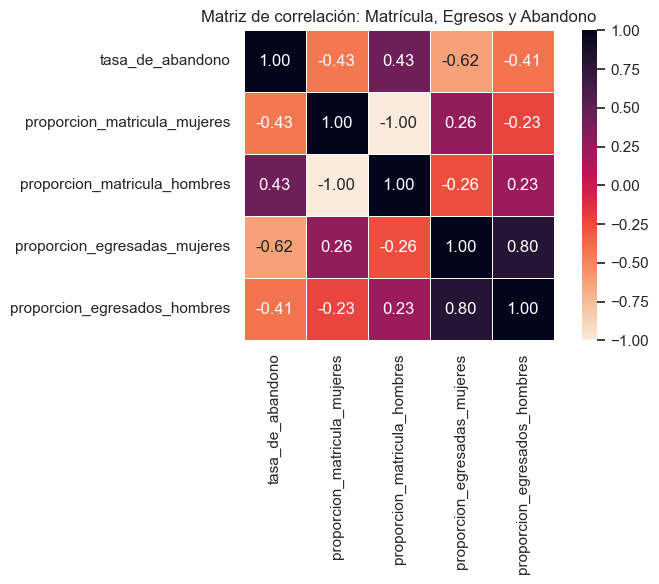

In [87]:
cols_corr = [
    "tasa_de_abandono",
    "proporcion_matricula_mujeres",
    "proporcion_matricula_hombres",
    "proporcion_egresadas_mujeres",
    "proporcion_egresados_hombres"
] # creamos la matriz de correlación

plt.figure(figsize=(8,6)) # fijamos el tamño
corr = df_estados[cols_corr].corr() # creamos la correlación entre el dataframe y la lista del cols correlacion. así mismo llamamos el metodo .corr() para ver su correlación jaja
sns.heatmap(corr, annot=True, fmt=".2f", cmap="rocket_r", linewidths=0.5, square=True) # creamos el gráfico de calor
plt.title("Matriz de correlación: Matrícula, Egresos y Abandono") # colocamos el titulo
plt.tight_layout() # ajustamos los datos
plt.show() # mostramos

# ***¿Que significan estos datos?***
Bueno practicamente nos estan diciendo tres cosas que me llamaron la atención, pero tambien eran evidentes a simple vista con los datos anteriores.

**Tasa de Abandono:** Muestra una fuerte correlación negativa con la proporción de egresados y egresadas, lo que es lógico: a mayor número de egresos, menor es el abandono. También presenta una correlación negativa moderada con la matrícula de mujeres.

**Matrícula:** La proporción de matrícula de mujeres tiene una correlación negativa perfecta (-1.00) con la proporción de matrícula de hombres, lo que se explica porque son porcentajes complementarios (uno sube, el otro baja).

**Egresos:** La proporción de egresadas y egresados tiene una fuerte correlación positiva (0.80). Esto indica que las proporciones de egresos de ambos géneros tienden a aumentar o disminuir juntas.

En resumen este heatmap o mapa de calor nos valida los datos anteriores y nos permite abrir el panorama a la hora de realizar conclusiones.

In [88]:

# Imprimimos el top 10 de cada matriculados por estado

top_matricula = df_estados.sort_values("matricula_total", ascending=False)
print("Top 10 estados por matrícula total:")
print(top_matricula[["estado","matricula_total"]].head(10))

# imprimimos el top 10 con más egresados o deserción escolar por estado

top_egresados = df_estados.sort_values("egresados_total", ascending=False)
print("\nTop 10 estados por egresados totales:")
print(top_egresados[["estado","egresados_total"]].head(10))

# imprimimos el top 10 de la tasa de abandono de cada estado

top_abandono = df_estados.sort_values("tasa_de_abandono", ascending=False)
print("\nTop 10 estados con mayor tasa de abandono:")
print(top_abandono[["estado","tasa_de_abandono"]].head(10))


print("----"*16)

# imprimimos el top 10 con menos matriculados por estado
top_menor = df_estados.sort_values("matricula_total", ascending=True)
print("Top 10 estados con menos matriculados:")
print(top_menor[["estado","matricula_total"]].head(10))


# imprimimos el top 10 de los menos egresados por estado

top_menor_egresados = df_estados.sort_values("egresados_total", ascending=True)
print("Top 10 estados con menos egresados:")
print(top_menor_egresados[["estado","egresados_total"]].head(10))



# imprimimos el top 10 con menor tasa de abandono por estado


top_menor_egresados = df_estados.sort_values("tasa_de_abandono", ascending=True)
print("Top 10 estados con menos tasa de abandono:")
print(top_menor_egresados[["estado","tasa_de_abandono"]].head(10))

Top 10 estados por matrícula total:
              estado  matricula_total
6   CIUDAD DE MÉXICO           989949
14            MÉXICO           604776
20            PUEBLA           353797
18        NUEVO LEÓN           309752
13           JALISCO           305353
29          VERACRUZ           261435
10        GUANAJUATO           233684
24           SINALOA           164215
1    BAJA CALIFORNIA           149165
27        TAMAULIPAS           147209

Top 10 estados por egresados totales:
              estado  egresados_total
6   CIUDAD DE MÉXICO           153746
14            MÉXICO           107752
20            PUEBLA            66523
13           JALISCO            60618
18        NUEVO LEÓN            53859
29          VERACRUZ            47798
10        GUANAJUATO            37793
4            CHIAPAS            32143
27        TAMAULIPAS            31699
1    BAJA CALIFORNIA            28685

Top 10 estados con mayor tasa de abandono:
              estado  tasa_de_abandono
6   CI

En conclusión vemos cuantitavamente los datos por matricula_total
en este caso sus egresados son 153746 en un periodo del 2023-2024
que concluyeron sus estudios y su tasa de abandono es el 61.88%

Esto es importante hablando de números y porcentajes para evaluar el estado de la educación superior en México con su top 10 más matriculados, egresados y con mayor tasa de abandono los tres los lidera CDMX por su alta cantidad poblacional

Pero tambien debemos hacer un enfoque con lo contrario los menores matriculados, los menores egresados y los que menos tienen tasa de diserción


---



---



# Ahora lo que hice fue un análisis de la Ciudad de méxico que es donde yo vivo,
gráficamos la proporcion de matricula y egresos donde imprime el total de datos de ambos puntos
Matricula total - Egresos totales y su tasa de abandono de hombre y mujer

             estado  matricula_total  egresados_total  tasa_de_abandono  \
6  CIUDAD DE MÉXICO           989949           153746             61.88   

   proporcion_matricula_mujeres  proporcion_matricula_hombres  \
6                      0.526228                      0.473772   

   proporcion_egresadas_mujeres  proporcion_egresados_hombres  
6                      0.085068                      0.070239  


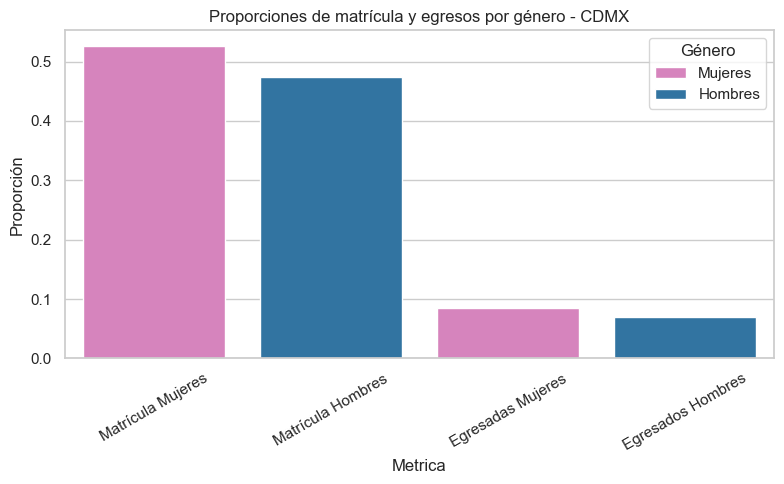

In [89]:
df_cdmx = df_estados[df_estados["estado"] == "CIUDAD DE MÉXICO"] # creamos otro dataframe de la ciudad de méxico


print(df_cdmx[[
    "estado","matricula_total","egresados_total","tasa_de_abandono",
    "proporcion_matricula_mujeres","proporcion_matricula_hombres",
    "proporcion_egresadas_mujeres","proporcion_egresados_hombres"
]]) # imprimimos sus datos del DF


df_cdmx_gen = pd.melt(
    df_cdmx,
    id_vars=["estado"],
    value_vars=[
        "proporcion_matricula_mujeres","proporcion_matricula_hombres",
        "proporcion_egresadas_mujeres","proporcion_egresados_hombres"        # selecciona las columnas por analizar
    ],
    var_name="Metrica",
    value_name="Proporción"
)
df_cdmx_gen['Genero'] = df_cdmx_gen['Metrica'].apply(lambda x: 'Mujeres' if 'mujeres' in x else 'Hombres') # clasificamos los datos
df_cdmx_gen['Metrica'] = df_cdmx_gen['Metrica'].map({
    "proporcion_matricula_mujeres": "Matrícula Mujeres",
    "proporcion_matricula_hombres": "Matrícula Hombres",
    "proporcion_egresadas_mujeres": "Egresadas Mujeres",
    "proporcion_egresados_hombres": "Egresados Hombres"
})
# reemplazamos los nombres


plt.figure(figsize=(8,5)) # tamaño
sns.barplot(x="Metrica", y="Proporción", hue="Genero", data=df_cdmx_gen, palette=colores)
plt.title("Proporciones de matrícula y egresos por género - CDMX")
plt.ylabel("Proporción")
plt.xticks(rotation=30)
plt.legend(title="Género")
plt.tight_layout()
plt.show()

# ¿Qué está pasando en la CDMX?

Ignoremos la tasa de abandono total de la republica méxicana, centremonos en la matricula mujeres y hombres con sus egresos en la Ciudad de México así mismo 
podemos darnos una idea del porcentage de egresados en hombres y mujeres.



| Estado           | Matrícula total | Egresados total | Tasa de abandono | % Matrícula mujeres | % Matrícula hombres | % Egresadas mujeres | % Egresados hombres |
|------------------|-----------------|-----------------|------------------|----------------------|----------------------|----------------------|----------------------|
| CIUDAD DE MÉXICO | 989,949         | 153,746         | 61.88%           | 52.62%              | 47.38%              | 8.51%               | 7.02%               |

### Sigamos con un diagrama de disperción entre la proporción de hombres y mujeres con su tasa de abandono


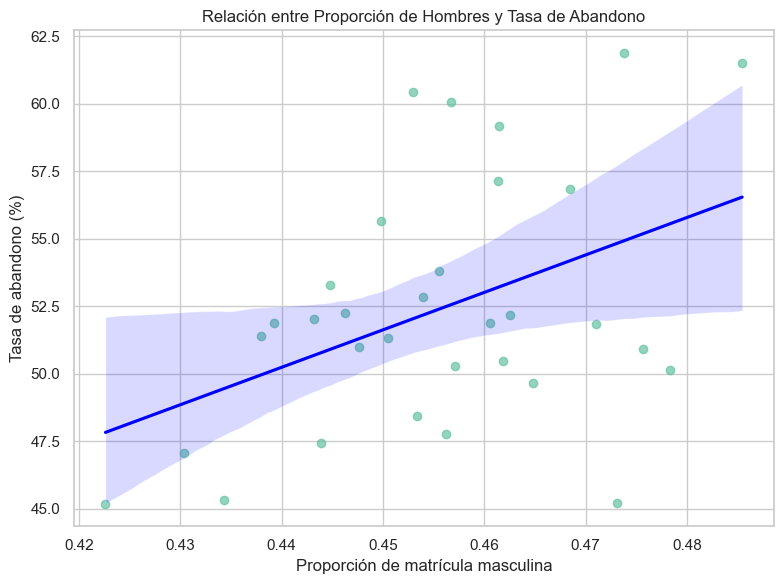

Correlación hombres-abandono: 0.43


In [90]:
plt.figure(figsize=(8,6)) # define el tamaño de la figura
sns.regplot(
    x="proporcion_matricula_hombres",
    y="tasa_de_abandono",
    data=df_estados,                        # usamos la X como proporción de hombres y Y como tasa de abandono
        # la clasificación es por el eje Y de tasa de abandono hecho
    scatter_kws={"alpha":0.7}, # transparencia de los puntos
    line_kws={"color":"blue"} # color de la linea azuk
)
plt.title("Relación entre Proporción de Hombres y Tasa de Abandono") # muestra el titulo del gráfico
plt.xlabel("Proporción de matrícula masculina") # proporcion de hombres y su matricukla
plt.ylabel("Tasa de abandono (%)") # su tasa de abandono
plt.tight_layout() # acomoda los puntos
plt.show() # los muestra

corr_h = df_estados["proporcion_matricula_hombres"].corr(df_estados["tasa_de_abandono"]) # correlación entre la proporción de hombres y la tasa de abandono
print(f"Correlación hombres-abandono: {corr_h:.2f}") # imprime la correlación entre ambos datos

## ¿Que dice el gráfico de la proporción masculina?
|Correlación hombres-abandono: 0.43 |
-------------------------------------
Indica que existe una relación directa entre la proporción de matrícula masculina y la tasa de abandono.

A mayor proporción de hombres en la matrícula, mayor tiende a ser la tasa de abandono

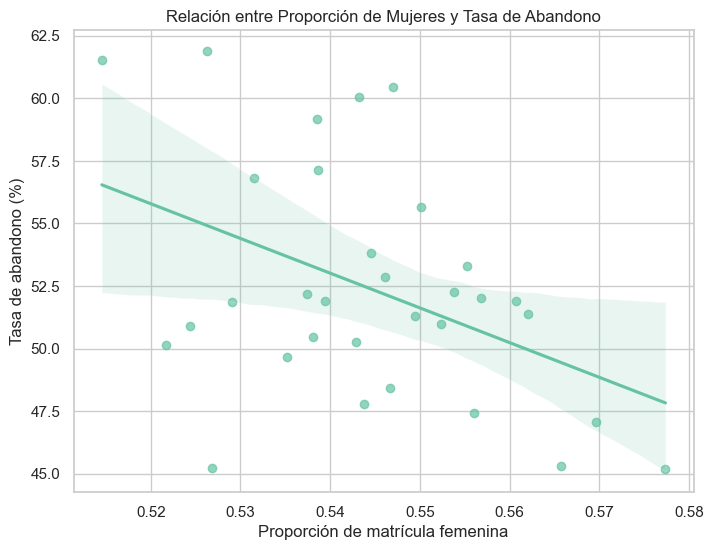

Correlación mujeres-abandono: -0.43


In [91]:
plt.figure(figsize=(8,6)) # tamaño de la figura
sns.regplot(x="proporcion_matricula_mujeres", # X como proporción de mujeres
            y="tasa_de_abandono",   # Y como tasa de abandono
            data=df_estados,                    # la clasificación es por el eje Y de tasa de abandono hecho
            scatter_kws={"alpha":0.7}) # transparencia de los puntos
plt.title("Relación entre Proporción de Mujeres y Tasa de Abandono") # titulo del gráfico
plt.xlabel("Proporción de matrícula femenina") # proporcion de mujeres y su matricula
plt.ylabel("Tasa de abandono (%)") #    su tasa de abandono
plt.show() # lo muestra

corr = df_estados["proporcion_matricula_mujeres"].corr(df_estados["tasa_de_abandono"]) # correlación entre la proporción de mujeres y la tasa de abandono
print(f"Correlación mujeres-abandono: {corr:.2f}") # imprime la correlación entre ambos datos


## ¿Que dice el gráfico de la proporción femenina?
|Correlación mujeres-abandono: -0.43 |
-------------------------------------
Indica que existe una relación inversa entre la proporción de matrícula femenina y la tasa de abandono.

A mayor proporción de mujeres en la matrícula, menor tiende a ser la tasa de abandono.

# ¿Que sigue?

### Mapeo de estados por tasa de abandono escolar

El objetivo es simple queremos un analisis visual de la tasa de abandono escolar por cada estado de forma visual y geografica.
Para esto vamos a ocupar un contenido de un archivo json de github donde vamos a colocar los parametros conforme a nuestro dataframe para realizar un modela
más exacto de los puntos, así mismo llenamos nuestros campos con el dataframe

In [92]:
df_estados["estado_norm"] = df_estados["estado"].str.upper() # normalizamos los estados a mayusculas para evitar errores en el mapeo

geojson = requests.get("https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json").json() # obtenemos el archivo json de github
for f in geojson["features"]: # iteramos en las features del json
    f["properties"]["name_norm"] = f["properties"]["name"].upper() # normalizamos los nombres a mayusculas para evitar errores en el mapeo




fig = go.Figure(go.Choroplethmapbox( # creamos el mapa
    geojson=geojson, # el archivo json obtenido
    locations=df_estados["estado_norm"], # la columna de los estados normalizados
    z=df_estados["tasa_de_abandono"],  # la columna de la tasa de abandono
    colorscale="Reds", # escala de color rojo
    featureidkey="properties.name_norm", # la llave del json
    marker_opacity=0.7, # opacidad del marcador
    marker_line_width=0 # ancho del marcador
))

fig.update_layout( # actualizamos el layout
    mapbox_style="carto-positron", # estilo del mapa
    mapbox_zoom=3.5, # zoom del mapa
    mapbox_center={"lat": 23.6345, "lon": -102.5528}, # centro del mapa
    title="Tasa de Abandono Escolar (%)" # titulo del gráfico
)

fig.show() # mostramos el gráfico   

C:\Users\Almicar\AppData\Local\Temp\ipykernel_8872\993571052.py:10: DeprecationWarning:

*choroplethmapbox* is deprecated! Use *choroplethmap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### Ahora me gustaría meterme en temas más serios como lo es Machine Learning, a continuación voy a realizar un cluster para cada matricula, egresos y abandonos

Para esto utilizaremos la libreria kmeans para realizar un aprendizaje no supervisado de autoclasificación por definición misma.
En este caso simplemente vamos a predecir como se comportan los datos cuando damos las columnas correctas, nos ayudará visualmente como se comportan los datos

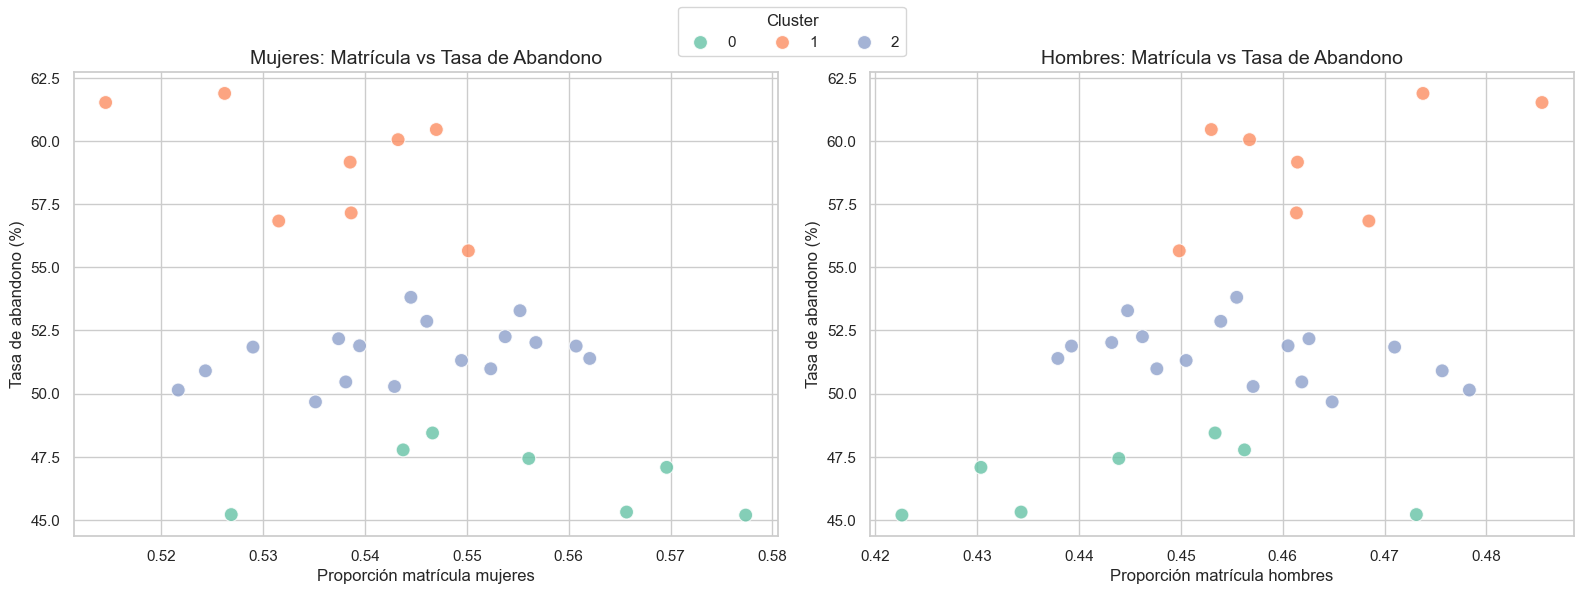

In [93]:
"""
Aprendizaje no supervisado con KMeans para la tasa de abandono escolar en México Hombres vs Mujeres

"""




X_cluster = df_estados[[
    "proporcion_matricula_mujeres",
    "proporcion_matricula_hombres",      # seleccionamos las columnas para el cluster
    "proporcion_egresadas_mujeres",
    "proporcion_egresados_hombres",
    "tasa_de_abandono"
]]


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # inicializamos KMeans con 3 clusters y una semilla para reproducibilidad
df_estados["Cluster"] = kmeans.fit_predict(X_cluster) # aplicamos el fit_predict para crear los clusters y los asignamos a una nueva columna en el dataframe


sns.set(style="whitegrid", palette="Set2") # configuramos el estilo y paleta de colores
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # creamos una figura con 2 subplots lado a lado


sns.scatterplot( 
    ax=axes[0], # primer gráfico
    data=df_estados, # usamos la X como proporción de mujeres y Y como tasa de abandono
    x="proporcion_matricula_mujeres",   # X como proporción de mujeres
    y="tasa_de_abandono", # Y como tasa de abandono
    hue="Cluster", # color del cluster
    palette="Set2", # paleta de colores
    s=100, # tamaño de los puntos
    alpha=0.8 # transparencia de los puntos
)
axes[0].set_title("Mujeres: Matrícula vs Tasa de Abandono", fontsize=14) # título del gráfico
axes[0].set_xlabel("Proporción matrícula mujeres") # etiqueta del eje X
axes[0].set_ylabel("Tasa de abandono (%)") # etiqueta del eje Y


sns.scatterplot(
    ax=axes[1], # segundo gráfico
    data=df_estados, # usamos la X como proporción de hombres y Y como tasa de abandono
    x="proporcion_matricula_hombres", # X como proporción de hombres
    y="tasa_de_abandono", # Y como tasa de abandono
    hue="Cluster", # color del cluster
    palette="Set2", # paleta de colores
    s=100, # tamaño de los puntos
    alpha=0.8 # transparencia de los puntos
)
axes[1].set_title("Hombres: Matrícula vs Tasa de Abandono", fontsize=14) # título del gráfico
axes[1].set_xlabel("Proporción matrícula hombres") # etiqueta del eje X
axes[1].set_ylabel("Tasa de abandono (%)") # etiqueta del eje Y


handles, labels = axes[1].get_legend_handles_labels() # obtenemos los handles y labels de la leyenda
fig.legend(handles[:3], labels[:3], title="Cluster", loc="upper center", ncol=3) # creamos la leyenda en la parte superior central
axes[0].get_legend().remove() # removemos las leyendas individuales
axes[1].get_legend().remove() # removemos las leyendas individuales
plt.tight_layout(rect=[0, 0, 1, 0.95]) # ajustamos el layout
plt.show() # mostramos

# ¿Que interpretamos con este Cluster

### Mujeres


**Cluster 0 (Verde): Baja Abandono y Variada Matrícula.**

Este grupo representa a los estados con la tasa de abandono más baja (alrededor del 45% al 48%).
La proporción de matrícula de mujeres en este grupo es relativamente alta, lo que implica una mayor presencia de mujeres en la matrícula total.
La alta proporción de mujeres en la matrícula total parece estar fuertemente asociada con una mejor retención estudiantil (menor abandono), lo cual es consistente con la correlación negativa vista en el primer análisis.

**Cluster 1 (Naranja): Alto Abandono y Matrícula Media.**

Este grupo agrupa a los estados con la tasa de abandono más alta (56% a 62%).
Su proporción de matrícula de mujeres se sitúa en un rango medio
Estos estados tienen serios problemas de retención. Su tasa de abandono supera el 55%.

**Cluster 2 (Azul): Abandono y Matrícula Media.**

Este es un grupo de estados intermedio con una tasa de abandono moderada (alrededor del 50% al 54%).

### Hombres

**Cluster 0 (Verde): Baja Abandono y Baja Matrícula.**

Sigue siendo el grupo de menor abandono (45% a 48%).
La proporción de matrícula de hombres es la más baja (alrededor de 0.42 a 0.45), lo cual es coherente, ya que la matrícula de mujeres en este cluster era la más alta.
**Cluster 1 (Naranja): Alto Abandono y Matrícula Media.**
El grupo de mayor abandono (56% a 62%).


**Conclusión del Cluster**

*La variable más importante que el algoritmo de clustering ha utilizado para agrupar los estados es la Tasa de Abandono.*
Los datos sugieren que existe una relación beneficiosa: los estados con una mayor proporción de mujeres en la matrícula total, tienden a tener una tasa de abandono significativamente menor (Cluster 0).
Y los datos con más proporción de hombres en la matricula total tienden a tener una tasa de abandono mayor (cluster 3)

In [94]:
df_estados.groupby("Cluster")[[
    "proporcion_matricula_mujeres","proporcion_matricula_hombres", # seleccionamos las columnas para agrupar y ver su media
    "proporcion_egresadas_mujeres","proporcion_egresados_hombres",
    "tasa_de_abandono"
]].mean() # agrupamos por cluster y vemos la media de cada columna con cluster


,proporcion_matricula_mujeres,proporcion_matricula_hombres,proporcion_egresadas_mujeres,proporcion_egresados_hombres,tasa_de_abandono
Cluster,,,,,
0,0.555149,0.444851,0.124090,0.089120,46.632857
1,0.536241,0.463759,0.099452,0.076520,59.086250
2,0.544065,0.455935,0.107732,0.080593,51.595882


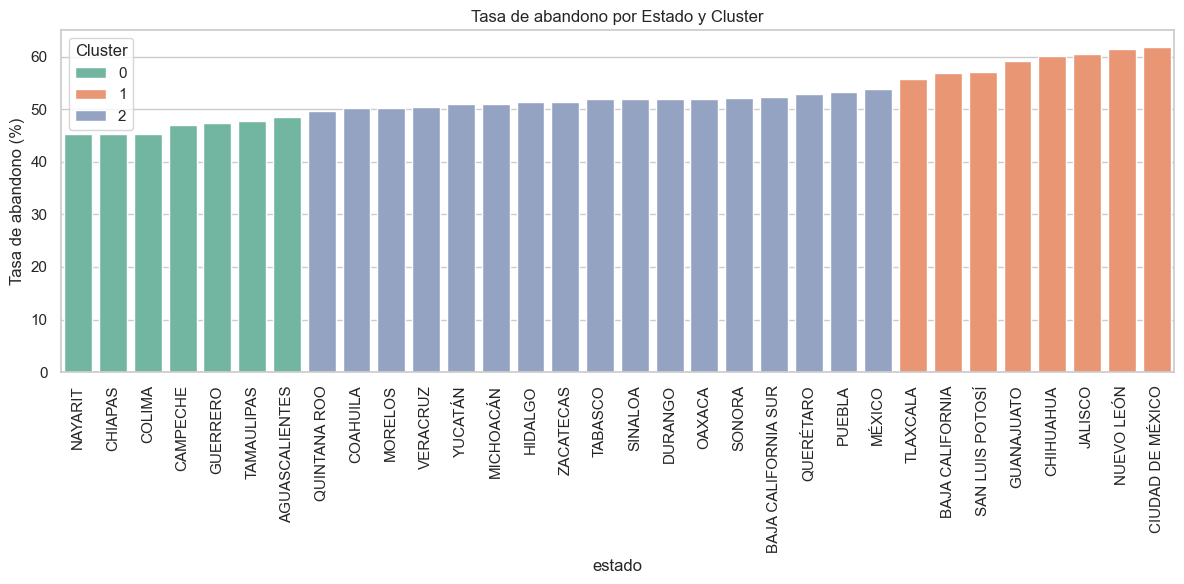

In [95]:

"""

Representación de los clusters por estado
por tasa de abandono

"""


plt.figure(figsize=(12,6)) # define el tamaño de la figura
sns.barplot(
    data=df_estados.sort_values("tasa_de_abandono"), # ordenamos los datos por tasa de abandono
    x="estado",
    y="tasa_de_abandono", # Y como tasa de abandono
    hue="Cluster", # color por cluster
    palette="Set2"  # paleta de colores Set2 (colores suaves y diferenciados
)
plt.xticks(rotation=90) # rotamos 90 grados el texto para que quepa
plt.ylabel("Tasa de abandono (%)") # etiqueta del eje Y
plt.title("Tasa de abandono por Estado y Cluster") # titulo del gráfico
plt.legend(title="Cluster") # titulo de la leyenda
plt.tight_layout() # ajustamos el layout
plt.show() # mostramos el gráfico

# Por ultimo


### Para confirmar los datos voy a realizar una regresión lineal de la proporción matricular mujeres y la matricula hombres vs su ingreso total

Entonces, tenemos como objetivo predecir la tasa de deserción escolar pero lo cual va a fallar estrepitosamente aproposito por el motivo que esto es un problema multifactorial
pero me permite confirmar las sospechas

MSE: 9.469553276375027
R²: -0.2607107201531311


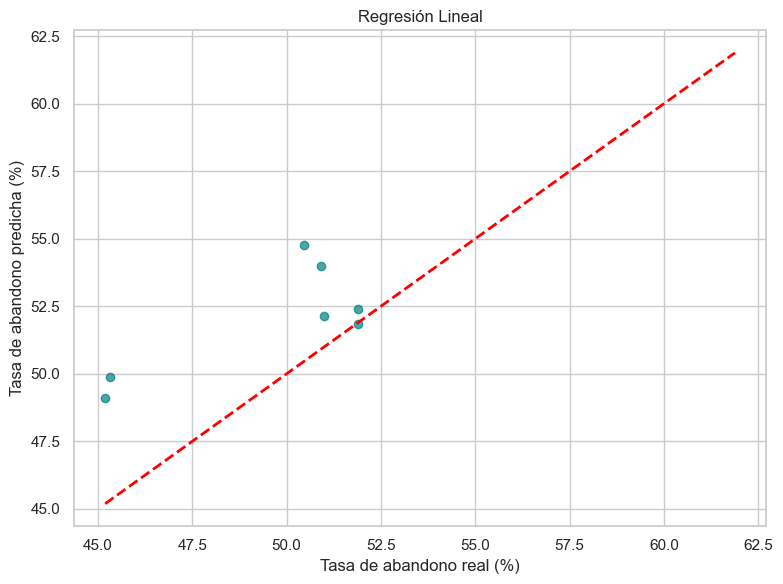

                       Variable  Coeficiente
2           nuevo_ingreso_total     1.585534
1  proporcion_matricula_hombres     0.604318
0  proporcion_matricula_mujeres    -0.604318


In [96]:
X = df_estados[[
    "proporcion_matricula_mujeres",
    "proporcion_matricula_hombres", #   seleccionamos las columnas para la regresión lineal
    "nuevo_ingreso_total"
]]

y = df_estados["tasa_de_abandono"] # variable objetivo

scaler = StandardScaler() #     escalador para estandarizar las características
X_scaled = scaler.fit_transform(X) # ajustamos y transformamos los datos

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # dividimos los datos en entrenamiento y prueba (80% - 20%)


linreg = LinearRegression() #   creamos el modelo de regresión lineal
linreg.fit(X_train, y_train) # entrenamos el modelo con los datos de entrenamiento
y_pred = linreg.predict(X_test) # hacemos predicciones con los datos de prueba

print("MSE:", mean_squared_error(y_test, y_pred)) # imprimimos el error cuadrático medio
print("R²:", r2_score(y_test, y_pred)) # imprimimos el coeficiente de determinación



plt.figure(figsize=(8,6)) # define el tamaño de la figura
plt.scatter(y_test, y_pred, color="teal", alpha=0.7, label="Predicciones")# transparencia de los puntos
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2,label="Ideal") # línea de referencia
plt.xlabel("Tasa de abandono real (%)")# etiqueta del eje X
plt.title("Regresión Lineal")# titulo del gráfico
plt.ylabel("Tasa de abandono predicha (%)")# etiqueta del eje Y
plt.tight_layout()# ajustamos el layout 
plt.show()# mostramos el gráfico

coef_df = pd.DataFrame({ # creamos un dataframe para ver los coeficientes de cada variable
    "Variable": X.columns, # las variables
    "Coeficiente": linreg.coef_ # los coeficientes
}).sort_values(by="Coeficiente", ascending=False) # ordenamos por coeficiente de mayor a menor
print(coef_df) # imprimimos el dataframe de los coeficientes

# `**Interpretación general de la regresión multivariada**`

---



#  nuevo_ingreso_total     1.585534
indica que entre más nuevos ingresos hay mayor tasa de abandono
algo lógico y facil de comprender


---

#proporcion_matricula_hombres     0.604318
indica que entre más matriculados hombres mayor tasa de abandono


---

#proporcion_matricula_mujeres    -0.604318
indica que entre más matriculadas mujeres hay menos tasa de abandono




# Conclusión: 

**Matrícula de Mujeres:** Por el contrario, una mayor proporción de mujeres matriculadas se correlaciona con una menor tasa de abandono, lo que indica que las mujeres tienden a permanecer en el sistema educativo en mayor proporción que los hombres.

**Distribución Geográfica del Abandono Escolar**
Mayor Tasa de Abandono: La Ciudad de México (CDMX), Nuevo León, Jalisco y Chihuahua son los estados que presentan las tasas más altas de abandono escolar. Esto es coherente con su alta densidad poblacional y la gran cantidad de estudiantes matriculados, lo que sugiere que, a pesar de la oferta educativa, existen factores locales que impulsan la deserción.

**Menor Matrícula:** Estados como Zacatecas y Tlaxcala muestran un número bajo de matriculados, lo que indica la necesidad de reforzar la oferta y el acceso a la educación superior en estas regiones para evitar la migración estudiantil y fomentar el desarrollo local.


## Con los modelos predictivos:
#### Factores de Impacto en la Tasa de Abandono Escolar
Nuevos Ingresos y Matrícula de Hombres: El análisis de regresión multivariada indica que un aumento en el número de nuevos ingresos y una mayor proporción de hombres matriculados están asociados con una tasa de abandono más alta. Esto sugiere que los hombres son un grupo demográfico con mayor riesgo de deserción escolar.

Como vimos, realmente no podemos predecir algún punto en concreto porque el problema es multifactorial, necesitamos analizar más allá de  (PIB, pobreza, desempleo juvenil) que pueden atribuir a este dataframe, por ahora, me interesa la validación de datos con clusters de cada estado. Por ende, Realizamos un Exploratory Data Analysis - *EDA* 

La tasa de abandono escolar en México es un problema multifactorial con una media estimada del 52.38%, lo que representa un desafío significativo a nivel nacional. El análisis de datos confirma que la deserción no se puede atribuir a una única causa, sino que es el resultado de una interacción compleja de factores demográficos, geográficos y de género.

Para abordar este problema de manera efectiva, es fundamental complementar los hallazgos de este análisis con un enfoque social que permita identificar y mitigar las barreras. Las estrategias de retención estudiantil deben ser focalizadas y adaptadas a las características particulares de cada estado y grupo demográfico.